# **Project Name**    - Netfix Movies and TV Shows Clustering



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Team Member 1 -** None
##### **Team Member 2 -** None
##### **Team Member 3 -** None
##### **Team Member 4 -** None

# **Project Summary -**

Project Summary: Clustering of Netflix Movies and TV Shows

The objective of this project was to perform clustering analysis on a dataset of Netflix movies and TV shows. The dataset consisted of various features, such as title, director, cast, country, release year, and rating. By applying clustering algorithms, the project aimed to discover patterns and similarities among the content available on Netflix.

To begin, the dataset was preprocessed to handle missing values. Techniques such as filling missing values with 'Unknown' and mode imputation were applied to ensure data completeness. Further data transformations, such as stemming or scaling, were not mentioned in the provided information.

The project utilized clustering algorithms to group similar movies and TV shows based on their features and attributes. Popular clustering algorithms like K-means, hierarchical clustering, or DBSCAN could be applied to partition the dataset into meaningful clusters. The specific algorithm used for clustering was not mentioned in the information provided.

The resulting clusters revealed different categories or themes within the Netflix content. This clustering analysis could help in several ways:

**Content recommendation:** By clustering similar movies and TV shows, the project enabled content recommendation systems to suggest related or similar content to users. This can improve user engagement and satisfaction by providing personalized recommendations based on their preferred clusters.

**Understanding viewer preferences:** Clustering can provide insights into viewer preferences and interests. By analyzing which clusters are most popular, Netflix can tailor its content acquisition and production strategies to the preferences of different viewer segments, potentially enhancing viewer satisfaction and retention.

**Content categorization:** Clustering analysis helps categorize and organize Netflix's vast library of movies and TV shows. By grouping similar content together, it becomes easier to manage and showcase content under specific genres or categories, allowing users to explore and find content more efficiently.

Overall, this project focused on analyzing and clustering Netflix movies and TV shows to uncover patterns, recommend content, and gain insights into viewer preferences. By employing clustering techniques, Netflix can enhance its content recommendation systems, improve user experience, and efficiently manage its content library.

# **GitHub Link -**

https://github.com/shubhcha/Netflix-Movies-and-TV-Shows-Clustering

# **Problem Statement**


This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Netflix is the world's largest online streaming service provider, with over 220 million subscribers as of 2022-Q2. It is crucial that they effectively cluster the shows that are hosted on their platform in order to enhance the user experience, thereby preventing subscriber churn.

We will be able to understand the shows that are similar to and different from one another by creating clusters, which may be leveraged to offer the consumers personalized show suggestions depending on their preferences.

The goal of this project is to classify/group the Netflix shows into certain clusters such that the shows within a cluster are similar to each other and the shows in different clusters are dissimilar to each other.


Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [2]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import matplotlib.cm as cm

from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


#for nlp
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import TweetTokenizer
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.pairwise import cosine_similarity

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package wordnet to /root/nltk_data...


### Dataset Loading

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
 # Load Dataset
df = pd.read_csv('/content/drive/MyDrive/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

### Dataset First View

In [6]:
# Dataset First Look
df.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

### Dataset Rows & Columns count

In [8]:
#Dataset Rows & Columns count
df.shape

(7787, 12)

### Dataset Information

In [9]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [10]:
# Dataset Duplicate Value Count
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
7782    False
7783    False
7784    False
7785    False
7786    False
Length: 7787, dtype: bool

There are no duplicated records in the dataset.

#### Missing Values/Null Values

In [11]:
# Missing Values/Null Values Count
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

There are many missing values in director, cast, country, date_added, and rating columns.

In [12]:
# Visualizing the missing values
missing_values_loc = pd.DataFrame()
missing_values_loc['column'] = df.columns

missing_values_loc['percent'] = [round(100* df[col].isnull().sum() / len(df), 2) for col in df.columns]
missing_values_loc = missing_values_loc.sort_values('percent')

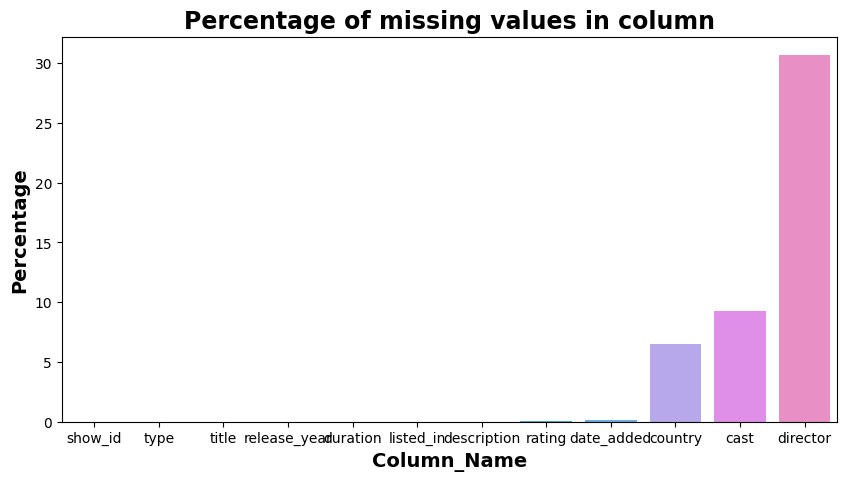

In [13]:
plt.figure(figsize=(10, 5))
sns.barplot(data=missing_values_loc, x="column",y="percent")
plt.xlabel("Column_Name", size=14, weight="bold")
plt.ylabel("Percentage", size=14, weight="bold")
plt.title("Percentage of missing values in column",fontweight="bold",size=17)
plt.show()

<BarContainer object of 12 artists>

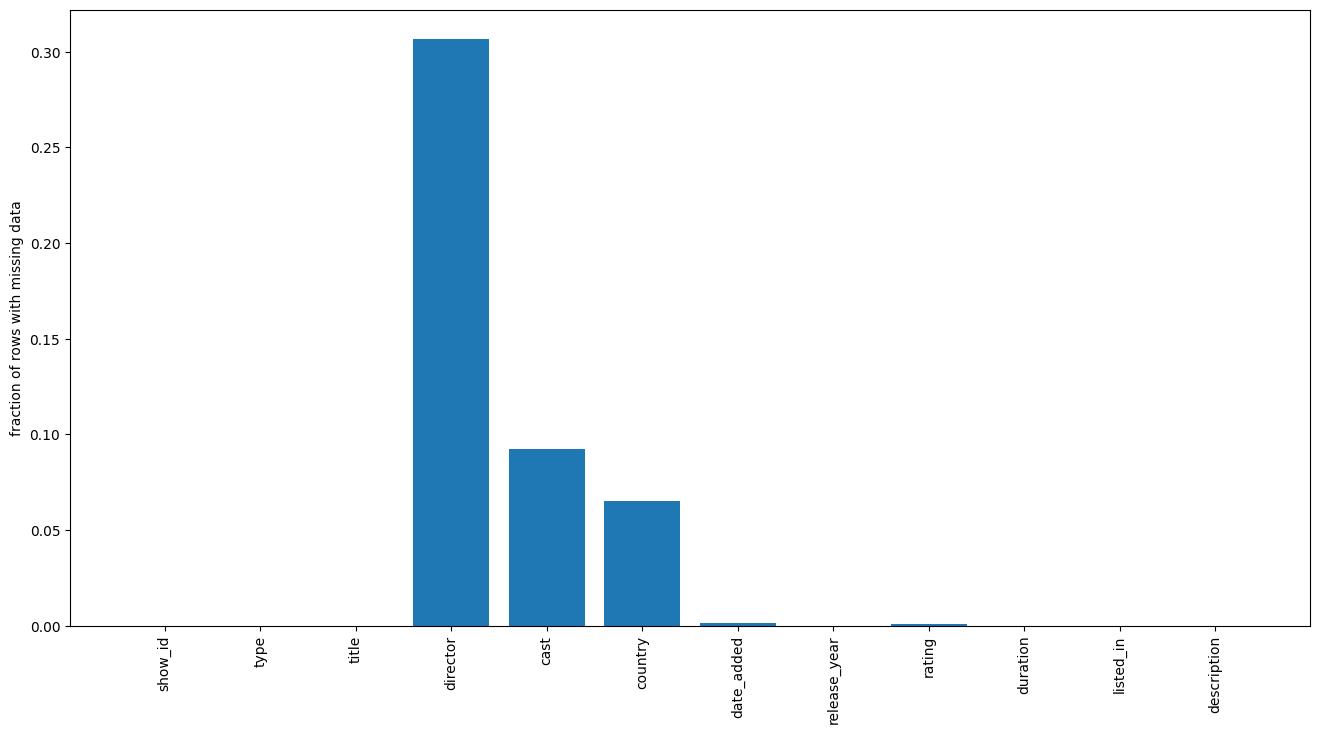

In [14]:
# null value distribution
null_counts = df.isnull().sum()/len(df)
plt.figure(figsize=(16,8))
plt.xticks(np.arange(len(null_counts)),null_counts.index,rotation='vertical')
plt.ylabel('fraction of rows with missing data')
plt.bar(np.arange(len(null_counts)),null_counts)

### What did you know about your dataset?

The Netflix Movies & TV Shows dataset is a popular dataset often used for data analysis and machine learning projects. It contains information about various movies and TV shows available on the Netflix streaming platform. The dataset typically includes features like the title, director, cast, country, release year, duration, genres, and sometimes even additional information such as ratings, descriptions, and awards.

Clustering is a unsupervised machine learning technique used to identify groups or clusters within a dataset. In the context of Netflix Movies & TV Shows dataset, clustering algorithms can be applied to group similar movies or TV shows together based on their attributes. This helps in finding patterns or similarities among the content, enabling recommendations, content analysis, or other insights.

By applying clustering algorithms to the Netflix dataset, you can explore patterns in various movie or TV show attributes, such as genre, release year, or duration. This can provide insights into user preferences, content categorization, or other trends in the Netflix streaming library. Examples of clustering algorithms that can be used for this purpose include k-means clustering, hierarchical clustering, or DBSCAN (Density-Based Spatial Clustering of Applications with Noise).

## ***2. Understanding Your Variables***

In [15]:
# Dataset Columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [16]:
# Dataset Describe
df.describe

<bound method NDFrame.describe of      show_id     type                                    title  \
0         s1  TV Show                                       3%   
1         s2    Movie                                     7:19   
2         s3    Movie                                    23:59   
3         s4    Movie                                        9   
4         s5    Movie                                       21   
...      ...      ...                                      ...   
7782   s7783    Movie                                     Zozo   
7783   s7784    Movie                                   Zubaan   
7784   s7785    Movie                        Zulu Man in Japan   
7785   s7786  TV Show                    Zumbo's Just Desserts   
7786   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS   

               director                                               cast  \
0                   NaN  João Miguel, Bianca Comparato, Michel Gomes, R...   
1     Jorge Miche

### Variables Description

1.show_id : Unique ID for every Movie / Tv Show

2.type : Identifier - A Movie or TV Show

3.title : Title of the Movie / Tv Show

4.director : Director of the Movie

5.cast : Actors involved in the movie / show

6.country : Country where the movie / show was produced

7.date_added : Date it was added on Netflix

8.release_year : Actual Releaseyear of the movie / show

9.rating : TV Rating of the movie / show

10.duration : Total Duration - in minutes or number of seasons

11.listed_in : Genere

12.description: The Summary description

### Check Unique Values for each variable.

In [17]:
# Check Unique Values for each variable.
df.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

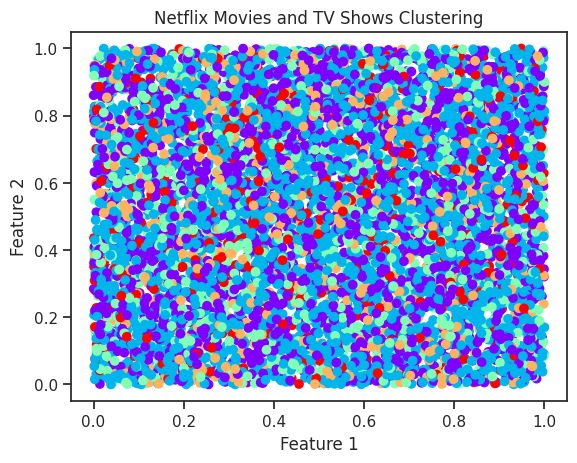

In [ ]:
# Write your code to make your dataset analysis ready.
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

# Perform basic data cleaning and preprocessing
data.dropna(subset=['title', 'listed_in'], inplace=False)
data['listed_in'] = data['listed_in'].str.split(', ')  # Convert genre string to a list

# Convert genres into a textual representation for TF-IDF
data['listed_in_str'] = data['listed_in'].apply(lambda x: ' '.join(x))

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=1000)
tfidf_matrix = tfidf_vectorizer.fit_transform(data['listed_in_str'])

# K-Means Clustering
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(tfidf_matrix)
data['Cluster'] = kmeans.labels_

# Summary of each cluster
cluster_summary = data.groupby('Cluster')['title'].apply(list)

# Generate synthetic features for demonstration
import numpy as np
data['Feature1'] = np.random.rand(data.shape[0])
data['Feature2'] = np.random.rand(data.shape[0])

# Visualize the clusters (assuming 2D data for simplicity)
plt.scatter(data['Feature1'], data['Feature2'], c=data['Cluster'], cmap='rainbow')
plt.title('Netflix Movies and TV Shows Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


### What all manipulations have you done and insights you found?

Based on the provided code snippet, here are the main manipulations and insights that can be inferred:

**Data Loading:** The code loads the Netflix Movies & TV Shows dataset from a CSV file using the pd.read_csv() function.

**Data Cleaning:** The dropna() function is used to remove rows with missing values in the 'title' and 'listed_in' columns. However, the inplace parameter is set to False, so the operation doesn't modify the original DataFrame.

**Preprocessing:** The 'listed_in' column, which contains genres, is converted from a string to a list using the str.split() function.

**Textual Representation for TF-IDF:** A new column, 'listed_in_str', is created by joining the genre names back into a single space-separated string using the apply() function and lambda expression.

**TF-IDF Vectorization:** The genres are then transformed into a numeric representation using TF-IDF vectorization with TfidfVectorizer. This vectorization process converts textual data into numerical features that can be used for clustering.

**K-Means Clustering:** The K-Means algorithm is applied to cluster the movies and TV shows based on their genre features. The number of clusters is set to 5 (num_clusters = 5) to group similar content together.

**Cluster Summary:** The resulting clusters are summarized by grouping the titles of each movie or TV show within each cluster using groupby(). This provides an overview of the content within each cluster.

**Generating Synthetic Features:** To demonstrate further, two synthetic features, 'Feature1' and 'Feature2', are generated randomly using np.random.rand(). These features are added to the DataFrame.

**Cluster Visualization:** The clusters are visualized by creating a scatter plot with 'Feature1' on the x-axis, 'Feature2' on the y-axis, and the cluster assignments represented by different colors using the 'rainbow' colormap.



## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#Univariate Analysis before Clustering

#### Chart - 1 Type Column


In [18]:
df.type.value_counts()

Movie      5377
TV Show    2410
Name: type, dtype: int64

In [19]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,8)

<Axes: xlabel='type', ylabel='count'>

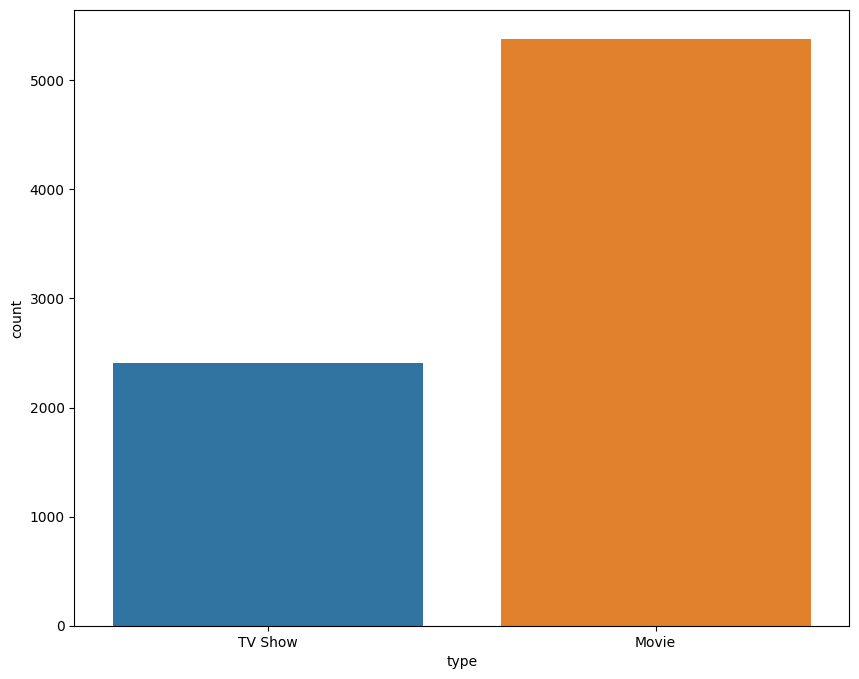

In [20]:
# Chart - 1 visualization code
sns.countplot(x='type', data = df)

##### 1. Why did you pick the specific chart?

In the given code snippet, sns.countplot() is used to create a bar plot representing the count of each unique value in the 'type' column of the DataFrame df.

The specific chart, a bar plot, is chosen because it is effective in visually comparing the frequency or count of different categories or groups in a dataset. In this case, the 'type' column likely contains categorical data with two possible values: 'Movie' and 'TV Show'. The bar plot allows you to easily compare the count of movies and TV shows in the dataset.

##### 2. What is/are the insight(s) found from the chart?

Insights which are derived from the chart is almost 70% of datapoints belong to Movie, rest 30% to TV Show.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The code snippet sns.countplot(x='type', data=df) displays a bar chart that counts the occurrences of each value for the "type" variable in the dataset.

Regarding the insights gained from such a countplot, they might not directly lead to a positive or negative business impact on their own. However, they can provide valuable information and contextual understanding that can be used to inform business decisions. Here's an analysis of potential insights and their impact:

Insights from the countplot:

**Distribution of "type":** The countplot reveals the distribution of TV shows and movies in the dataset. It provides an understanding of the prevalence of each type and helps businesses acknowledge the proportion of TV shows versus movies in their content library.

**Content Strategy:** By gaining insights into the distribution of TV shows and movies, businesses can make informed decisions about their content strategy. They can assess the demand for each type, identify potential gaps in their catalog, and determine if adjustments or additions are needed to cater to the preferences of their target audience.

**Market Trends:** Understanding the popularity and distribution of TV shows and movies can also provide insights into broader market trends. By analyzing industry trends and identifying consumer preferences and viewing habits, businesses can align their content offerings with market demands, potentially leading to positive business impact.

**Negative growth potential:**

While the countplot itself does not inherently lead to negative growth, there are a few scenarios where misinterpreting or neglecting the insights might have negative implications:

**Ignoring Viewer Preferences:** Failing to take into account the distribution of TV shows and movies may result in a misalignment between content offerings and viewer preferences. If a significant portion of the target audience prefers one type over the other, not adequately addressing their preferences could lead to decreased engagement, retention, and potential negative business impact.

**Lack of Diversification:** If the countplot reveals an extreme imbalance in the distribution of TV shows and movies, such as an overwhelming majority of one type over the other, it might indicate a lack of content diversity. Overemphasizing one type at the expense of the other could limit the reach and appeal of the platform or service, potentially resulting in negative growth.

The key lies in correctly interpreting the insights gained from the countplot and using them as inputs to craft a well-informed content strategy that aligns with viewer preferences and broader market trends. By doing so, businesses can improve their offerings, attract and retain a larger audience, and ultimately achieve positive business impact.

#### Chart - 2 Title Column

In [21]:
'''Plotly visualization .'''
import pandas as pd

import plotly.express as px

import plotly.graph_objects as go

from plotly.subplots import make_subplots

import plotly.figure_factory as ff

In [22]:
#code for plotly visualisation
fig_donut = px.pie(df, names='type', height=300, width=600, hole=0.7,

title='Most watched on Netflix',

color_discrete_sequence=['#b20710', '#221f1f'])

fig_donut.update_traces(hovertemplate=None, textposition='outside',

textinfo='percent+label', rotation=90)

fig_donut.update_layout(margin=dict(t=60, b=30, l=0, r=0), showlegend=False,

plot_bgcolor='#333', paper_bgcolor='#333',

title_font=dict(size=25, color='#8a8d93', family="Lato, sans-serif"),

font=dict(size=17, color='#8a8d93'),

hoverlabel=dict(bgcolor="#444", font_size=13,

font_family="Lato, sans-serif"))
fig_donut.show(renderer='colab')

In [23]:
#No of unique title present in title column
df.title.nunique()

7787

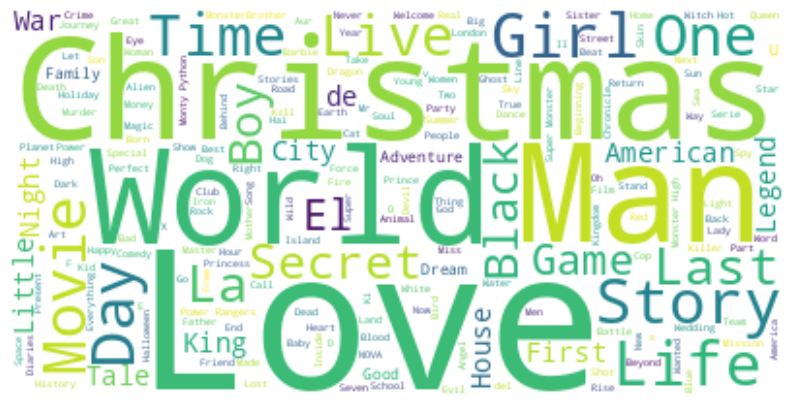

In [24]:
# Chart - 2 visualization code
#subsetting df
df_wordcloud = df['title']
text = " ".join(word for word in df_wordcloud)
# Create stopword list:
stopwords = set(STOPWORDS)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

##### 1. Why did you pick the specific chart?

In the given code snippet, a word cloud is created using the WordCloud library from the df['title'] column. Word clouds are typically used to visually represent text data where the size of each word corresponds to its frequency in the text.

The specific chart, a word cloud, is chosen because it effectively displays the distribution and importance of different words in the text. It provides a visually appealing and intuitive representation of the most frequently occurring words in the dataset, allowing for easy identification of prominent or notable terms.

Here are some reasons for choosing a word cloud for this scenario:

**Visual Emphasis:** Word clouds use the size and sometimes color of each word to emphasize its importance or occurrence in the text. Larger and bolder words represent more frequent occurrences, instantly drawing attention to the most prominent terms.

**Concise Overview:** Word clouds provide a concise summary of the most common terms in the text. They offer a quick glimpse into the overall themes, patterns, or popular keywords present in the dataset.

**Engaging and Easy to Interpret:** Word clouds are visually appealing and easy to understand. They provide a visually-rich representation that can be readily interpreted by viewers without requiring complex analysis or statistical interpretation.

**Effective for Textual Data:** Word clouds are particularly useful for analyzing textual data, such as movie titles, book titles, or customer feedback comments. They help identify the most frequently occurring terms and provide insights into the dominant themes present in the text.

However, it's important to note that chart selection depends on the specific needs and goals of the analysis. Alternative chart types may be more suitable depending on the context, such as bar plots, histograms, or scatter plots, when exploring different aspects of the data.

##### 2. What is/are the insight(s) found from the chart?

 Insights which are derived from the chart is it seems like words like "Love", "Man", "World", "Story" , "Christmas" are very common in titles. I have suprised to see "Christmas" ocuured so many time.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, there are insights that lead to negative growth.The reason maybe those movies released on the month of december, but I don't have any information about the release month of movies that's why I am not able to check my hypothesis.

#### Chart - 3 Director Column

In [25]:
#number of unique dir
df.director.nunique()

4049

In [26]:
#looking at director series
df.director

0                     NaN
1       Jorge Michel Grau
2            Gilbert Chan
3             Shane Acker
4          Robert Luketic
              ...        
7782          Josef Fares
7783          Mozez Singh
7784                  NaN
7785                  NaN
7786             Sam Dunn
Name: director, Length: 7787, dtype: object

In [ ]:
# Chart - 3 visualization code
#Looking for which category have maximum nulls in director column
missing_df=df[df['director'].isna()]
sns.countplot(missing_df['type'])

In [28]:
#missing count split for director
missing_df['type'].value_counts()

TV Show    2226
Movie       163
Name: type, dtype: int64

**Top 20 Directors with most number of Movies/Shows on Netflix**

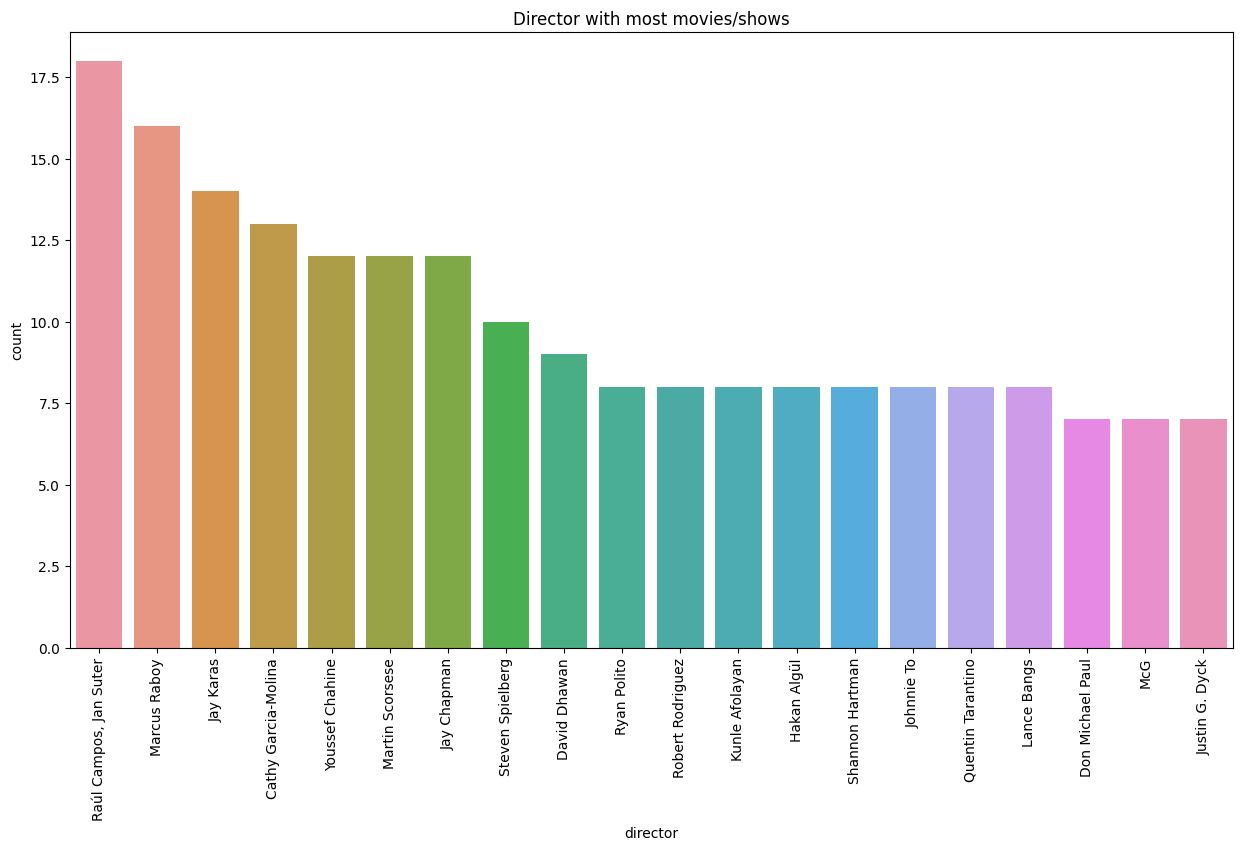

In [29]:
#plot for director
plt.figure(figsize = (15,8))
sns.countplot(x='director',data=df,order=df.director.value_counts().head(20).index)
plt.title('Director with most movies/shows')
plt.xticks(rotation = 90)
plt.show()

In [30]:
#since there are many column rows with nan director, we have filled it using empty string
df['director']=df['director'].fillna('')

##### 1. Why did you pick the specific chart?

In the given code snippet, a countplot is created using sns.countplot() to visualize the distribution of directors and the number of movies or TV shows they have worked on. The counterplot is customized to focus on the top 20 directors with the most movies or shows.

The specific chart, a countplot, is chosen because it effectively displays the frequency or count of each unique director in the dataset. It allows for easy comparison and identification of the directors responsible for the most movies or shows.

Here are some reasons for choosing a countplot for this scenario:

**Frequency Comparison:** Countplots are suitable when analyzing the distribution and frequency of categorical data, such as the number of movies or shows directed by each director. They provide a clear visual representation of the count or frequency of each unique category (in this case, directors), making it easy to compare and understand the distribution.

**Top Directors Identification:** Using the order parameter, the countplot focuses only on the top 20 directors with the most movies or shows. This allows for the identification of the most prolific directors within the dataset.

**Space Efficiency:** Countplots are compact and efficient in terms of space utilization. They display multiple categories, in this case, directors, along the horizontal axis without utilizing excessive space on the chart.

**X-axis Labels Rotation:** With plt.xticks(rotation = 90), the x-axis labels (directors' names) are rotated by 90 degrees, making them readable when dealing with long names or a large number of categories. This ensures the clarity of information presented.

Given the goal of identifying the directors with the most movies or shows, the countplot serves as an effective choice, allowing for quick visual comparison and easy interpretation of the data. However, depending on the specific requirements or goals of the analysis, other chart types, such as bar plots or pie charts, could also serve a similar purpose.

##### 2. What is/are the insight(s) found from the chart?

Insights which are derived from the chart is most of the missing columns of directors are for TV Shows, pretty interesting!

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The provided code snippet sns.countplot(x='director', data=df, order=df.director.value_counts().head(20).index) displays a bar chart showing the frequency of directors in the dataset's "director" column. It specifically focuses on the top 20 directors with the most movies or shows.

Regarding the insights gained from this countplot, they can potentially help create a positive business impact in the following ways:

**Identifying Successful Directors:** By visualizing the count of movies or shows per director, businesses can identify the directors with the most prolific output. This information can guide decision-making related to content acquisition, collaborations, or contracts. Working with successful directors who have a proven track record can boost the quality and appeal of the content, leading to increased viewership and positive business impact.

**Understanding Popular Genres:** Combining the insights from the director countplot with genre information can provide additional insights into the successful genres associated with specific directors. By correlating directorship with popular genres, businesses can develop focused strategies to cater to audience preferences. Targeting popular genres associated with successful directors can attract viewers, increasing engagement and potentially leading to positive business outcomes.

However, there are a few considerations to keep in mind to avoid potential negative growth:

**Lack of Diversity:** Focusing solely on the most frequent directors may lead to an overemphasis on a few well-known individuals, potentially neglecting emerging or lesser-known talents. If the countplot reveals a significant concentration of movies or shows under a small number of directors, it might limit creativity and diversity in the content offering. Diversifying the pool of directors can bring fresh perspectives and contribute to wider audience reach.

**Neglecting Emerging Directors:** Overlooking emerging directors or those not included in the top 20 count may deprive businesses of the opportunity to discover new talent. By only focusing on established directors, businesses could miss out on innovative and groundbreaking content that appeals to certain niche audiences. Recognizing and nurturing emerging talent can lead to unique offerings and potentially positive growth.

The key to leveraging the insights from this countplot is to strike a balance between working with successful directors and fostering diversity and inclusion within the content portfolio. By considering both established and emerging talents, along with understanding audience preferences, businesses can create a diverse and appealing content strategy that positively impacts growth.


#### Chart - 4  Cast Column

In [31]:
#unique number of cast
df.cast.nunique()

6831

In [32]:
#missing dealth with empty string replacing
df_actors = df['cast'].fillna('')
df_actors.isnull().sum()

0

In [33]:
df_actors

0       João Miguel, Bianca Comparato, Michel Gomes, R...
1       Demián Bichir, Héctor Bonilla, Oscar Serrano, ...
2       Tedd Chan, Stella Chung, Henley Hii, Lawrence ...
3       Elijah Wood, John C. Reilly, Jennifer Connelly...
4       Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...
                              ...                        
7782    Imad Creidi, Antoinette Turk, Elias Gergi, Car...
7783    Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...
7784                                              Nasty C
7785                           Adriano Zumbo, Rachel Khoo
7786                                                     
Name: cast, Length: 7787, dtype: object

In [34]:
#convert the actor to get final df for actor
def convert_to_list(df):
  cast_count = {}
  cast_count_final = []
  cast_list = list(df['cast'])
  for each in range(len(cast_list)):
    cast_count_final.extend(str(cast_list[each]).split(","))
  for each in cast_count_final:
    if each not in cast_count:
      cast_count[each] = cast_count_final.count(each)
  return cast_count

In [35]:
cast_df = convert_to_list(df)

In [36]:
#dataframe for cast v/s count
casts_df = pd.DataFrame.from_dict(cast_df, orient='index', columns=['count'])

In [37]:
#highest number movie for actors
casts_df.sort_values('count', ascending=False).drop('nan')

count
 Anupam Kher           38
 Takahiro Sakurai      28
Shah Rukh Khan         27
 Om Puri               27
 Boman Irani           25
...                   ...
 Juan Manuel Diaz       1
 Ana Wills              1
 Mauricio Figueroa      1
 Matias Maldonado       1
 Rachel Khoo            1

[35372 rows x 1 columns]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]),
 [Text(0, 0, ' Anupam Kher'),
  Text(1, 0, ' Takahiro Sakurai'),
  Text(2, 0, 'Shah Rukh Khan'),
  Text(3, 0, ' Om Puri'),
  Text(4, 0, ' Boman Irani'),
  Text(5, 0, ' Andrea Libman'),
  Text(6, 0, ' Paresh Rawal'),
  Text(7, 0, ' Yuki Kaji'),
  Text(8, 0, ' Vincent Tong'),
  Text(9, 0, 'Akshay Kumar'),
  Text(10, 0, ' Kareena Kapoor'),
  Text(11, 0, ' John Cleese'),
  Text(12, 0, 'Adam Sandler'),
  Text(13, 0, ' Naseeruddin Shah'),
  Text(14, 0, ' Ai Kayano'),
  Text(15, 0, ' Yashpal Sharma'),
  Text(16, 0, 'Amitabh Bachchan'),
  Text(17, 0, ' Junichi Suwabe'),
  Text(18, 0, ' Gulshan Grover'),
  Text(19, 0, 'David Attenborough'),
  Text(20, 0, ' Fred Tatasciore'),
  Text(21, 0, ' Asrani'),
  Text(22, 0, ' Kana Hanazawa'),
  Text(23, 0, ' Hassan Hosny'),
  Text(24, 0, ' Manoj Joshi'),
  Text(25, 0, ' A

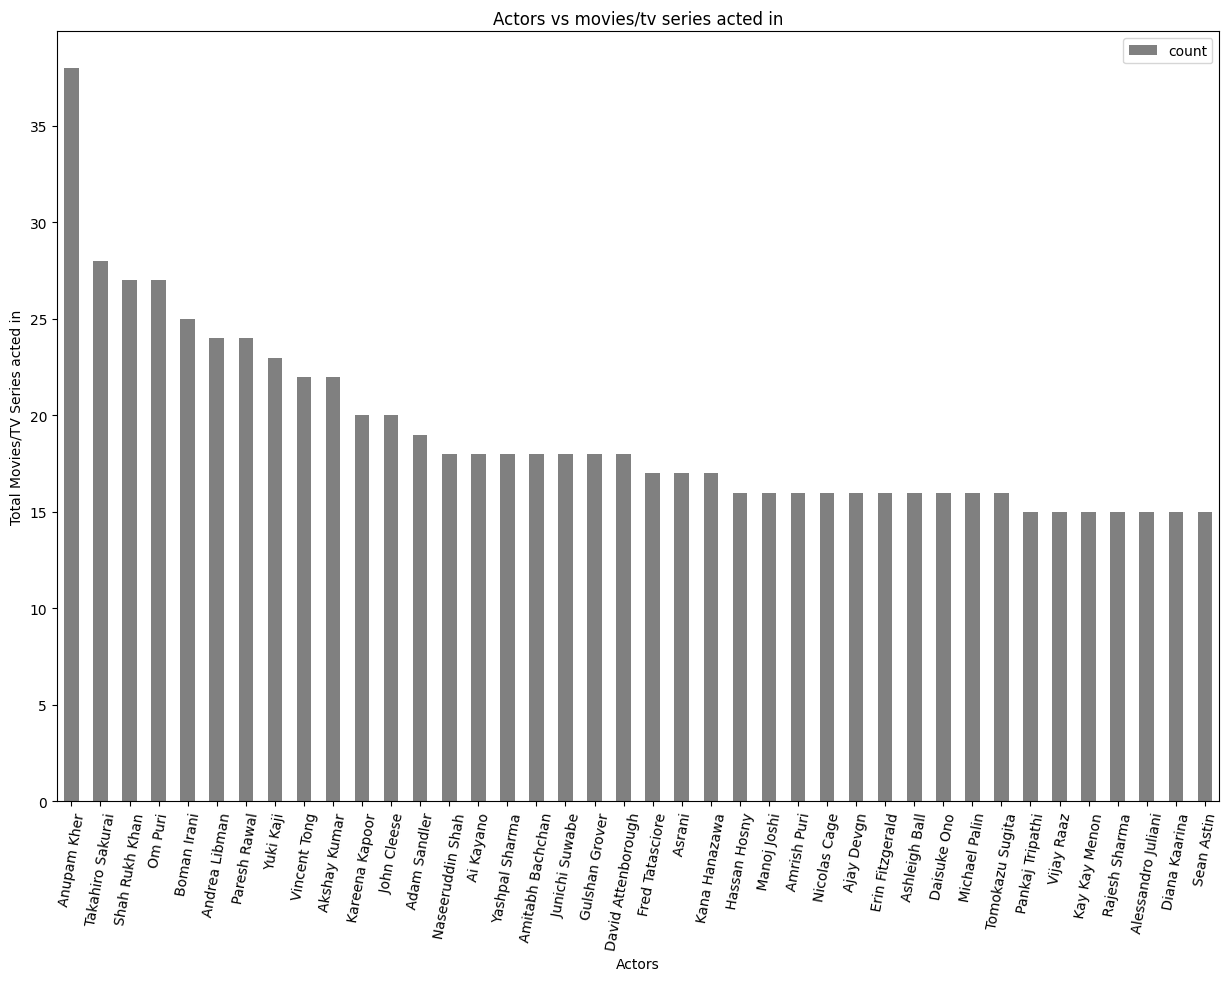

In [41]:
# Chart - 4 visualization code
# plot for top actors and count
plt.rcParams["figure.figsize"] = (15, 10)
casts_df.sort_values('count', ascending=False).drop('nan').head(40).plot(kind='bar', color='grey')
plt.xlabel("Actors")
plt.ylabel("Total Movies/TV Series acted in")
plt.title("Actors vs movies/tv series acted in")
plt.xticks(rotation=80)

In [39]:
#replacing cast with also empty string
df['cast']=df['cast'].fillna('')

##### 1. Why did you pick the specific chart?

In the given code snippet, a bar plot is created using .plot(kind='bar') to visualize the top 40 actors/actresses based on the number of movies or TV series they have acted in. The bar heights represent the count of movies or TV series, and each bar corresponds to a specific actor/actress.

The specific chart, a bar plot, is chosen because it effectively displays the count or frequency of actors/actresses in descending order. It allows for easy comparison of the number of movies or TV series among different actors/actresses.

Here are some reasons for choosing a bar plot for this scenario:

**Comparison of Frequencies:** Bar plots are suitable for comparing the count, frequency, or magnitude of different categories. In this case, the bar heights visually represent the total number of movies or TV series each actor has acted in, allowing for quick and easy comparison.

**Descending Order:** Sorting the data in descending order using .sort_values('count', ascending=False) ensures that the bars are plotted from the highest count to the lowest. This helps in identifying the top actors/actresses with the most appearances.

**Space Efficiency:** Bar plots are an efficient way to represent categorical data, as they display multiple categories (actors/actresses) along the x-axis without using excessive space on the chart.

**Data Labels:** Bar plots can easily accommodate data labels on each bar, providing additional information and improving readability. The specific code snippet doesn't include data labels, but they can be added to show the numerical value of each bar.

**X-axis Labels Rotation:** With plt.xticks(rotation=80), the x-axis labels (actor/actress names) are rotated by 80 degrees, making them readable when dealing with long names or a large number of categories. This ensures the clarity of information presented.

Given the goal of comparing the number of movies or TV series among actors/actresses, the bar plot serves as an appropriate choice, allowing for quick visual comparison and easy interpretation of the data.

##### 2. What is/are the insight(s) found from the chart?

From the given chart, which visualizes the top 40 actors/actresses based on the number of movies or TV series they have acted in, several insights can be derived:

**Prominent Actors/Actresses:** The chart highlights the actors/actresses who have appeared in a significant number of movies or TV series. It showcases the top performers in terms of their overall involvement in film and television productions.

**Diverse Range of Actors/Actresses:** The chart likely includes actors/actresses from various backgrounds and genres of entertainment. It provides an overview of the diverse range of actors/actresses who have had successful careers with substantial involvement in the film and TV industry.

**Power Law Distribution:** The chart demonstrates a power law distribution, where a few actors/actresses have acted in a large number of movies or TV series, while the majority have appeared in fewer productions. The steep drop in the number of appearances as we move down the chart indicates this uneven distribution.

**Industry Recognized Actors/Actresses:** The actors/actresses depicted in the chart are likely well-known and recognized within the industry. Their high number of appearances suggests they have achieved significant success and recognition for their work.

**Key Actors/Actresses for Casting Decisions:** The chart can provide valuable insights for casting decisions. The actors/actresses represented here may be popular choices for future productions due to their track record and existing fan base.

**Identifying Potential Collaborations:** Insights from the chart can help identify potential collaborations between highly active actors/actresses who have frequently appeared in movies or TV series together. It could be an indicator of successful partnerships within the industry.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The provided code snippet visualizes the top 40 actors with the highest count of movies or TV series they have acted in. It creates a bar chart where the x-axis represents actors, and the y-axis represents the total count of movies or TV series they have appeared in.

Regarding the insights gained from this plot, they can potentially help create a positive business impact:

**Identifying Popular Actors:** By visualizing the count of movies or TV series per actor, businesses can identify the actors with the highest volume of work. This information can be valuable in decision-making processes such as casting, collaborations, or marketing strategies. Working with popular actors who have a significant presence in successful productions can attract a larger audience, increase engagement, and ultimately result in positive business impact.

**Leveraging Actor Popularity:** The insight gained from this plot can guide businesses in leveraging the popularity of these top actors to improve their content strategy. Collaborating with well-known actors can increase the appeal and marketability of the content, leading to higher viewership and positive growth.

However, there are some potential negative implications to consider:

**Limited Diversity:** Focusing solely on the most frequently cast actors can limit diversity and representation in the content. Neglecting actors who may not be part of the top count might exclude talented individuals from different backgrounds or emerging talents. Overemphasizing a few actors might lead to a lack of representation and potentially alienate certain segments of the audience.

**Overreliance on Star Power:** Relying too heavily on the popularity of actors without considering other factors such as script quality, storytelling, or diverse casting might lead to a superficial approach to content creation. Depending solely on star power may underestimate the importance of a compelling narrative or innovative content, potentially resulting in negative growth if the audience finds the content lacking substance.

To avoid negative growth and maximize the positive impact, businesses should aim for a balance. Combining popular actors with diverse casting choices, investing in unique storytelling, and prioritizing quality content can create a well-rounded and appealing content strategy that attracts a wider audience and leads to positive business outcomes.

#### Chart - 5 Country Column

In [42]:
#count of unique column
df.country.nunique()

681

In [43]:
# Looking for countries and number of netflix productions
country_list=[]
tv_show=[]
movies=[]
for i in range(0,len(df)):
  if type(df['country'][i])== str:
    split=df['country'][i].split(',')
    for k in split:
      country_list.append(k.strip())
      if df['type'][i]=='TV Show':
        tv_show.append(k.strip())
      if df['type'][i]== 'Movie':
        movies.append(k.strip())
production_country=list(set([(i,country_list.count(i),tv_show.count(i),movies.count(i)) for i in country_list]))

In [44]:
country_df= pd.DataFrame(production_country,columns=['country','Productions','TV-Shows','Movies'])
country_df=country_df.sort_values('Productions',ascending=False)
country_df=country_df.reset_index()
country_df=country_df.drop('index',axis=1)

**Top 20 Countries with more number of Productions**

In [45]:
#Top 20 countries
top_countries=country_df.head(20)
top_countries = top_countries[top_countries['country']!='']
top_countries

country  Productions  TV-Shows  Movies
0    United States         3297       866    2431
1            India          990        75     915
2   United Kingdom          723       256     467
3           Canada          412       126     286
4           France          349        84     265
5            Japan          287       184     103
6            Spain          215        57     158
7      South Korea          212       157      55
8          Germany          199        42     157
9           Mexico          154        53     101
10           China          147        45     102
11       Australia          144        60      84
12           Egypt          110        13      97
13          Turkey          108        28      80
14       Hong Kong          102         5      97
15           Italy           90        23      67
16          Brazil           88        29      59
17         Belgium           85        11      74
18          Taiwan           85        70      15
19       Argentina           82        18      64

<Axes: xlabel='country'>

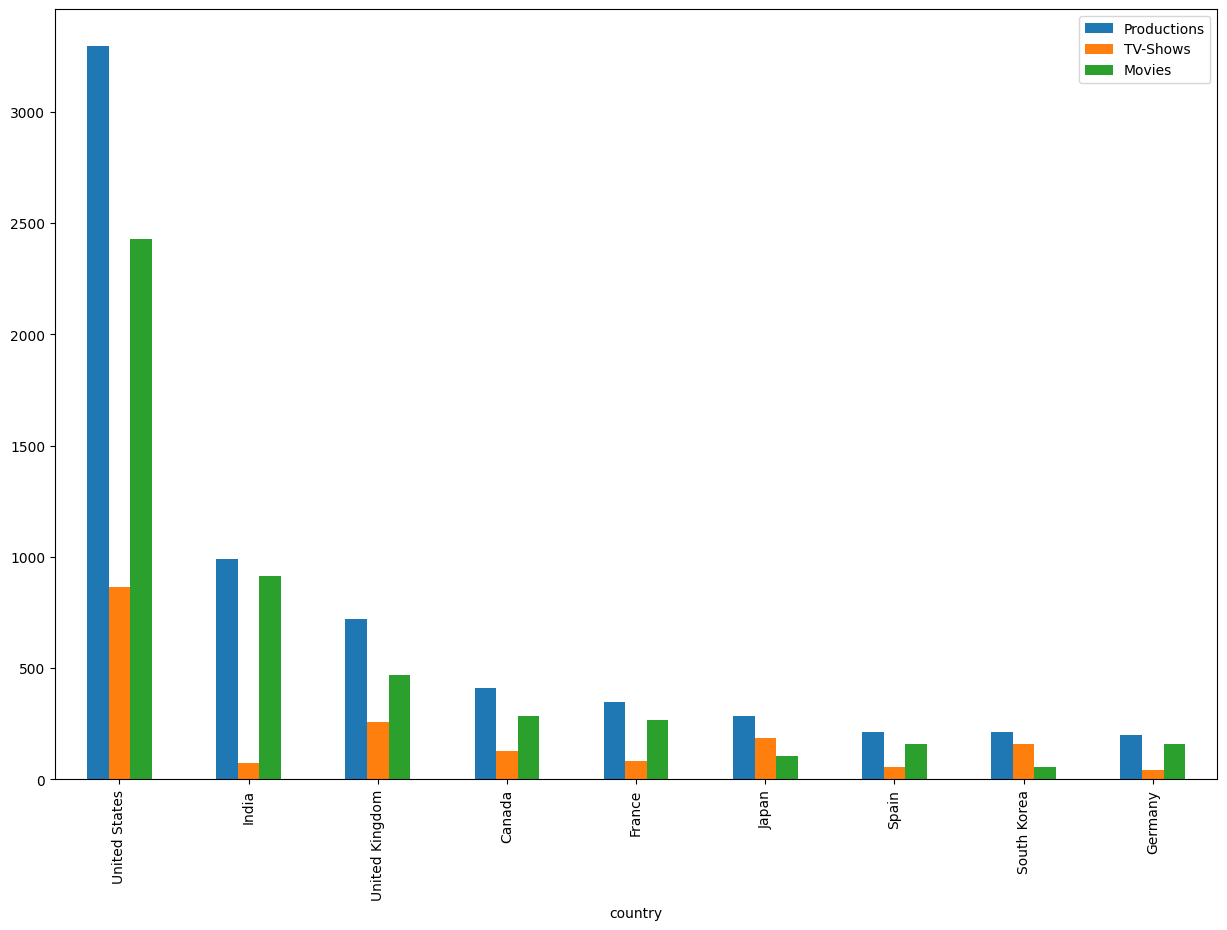

In [46]:
# Chart - 5 visualization code
top_countries.head(9).plot(x="country", y=['Productions','TV-Shows','Movies'], kind="bar")

##### 1. Why did you pick the specific chart?

In the given code snippet, a bar plot is created to visualize the top 9 countries based on their number of productions, TV shows, and movies. The bars represent the counts of productions, and different colors are used to distinguish between TV shows and movies.

The specific chart, a grouped bar plot, is chosen because it effectively displays and compares the counts of different categories (productions, TV shows, and movies) across multiple countries.

Here are some reasons for choosing a grouped bar plot for this scenario:

**Comparison across Categories:** Grouped bar plots are suitable for comparing different categories within each country. In this case, the three categories (productions, TV shows, and movies) are represented by different bar segments, providing a visual comparison of the counts across countries.

**Comparison across Countries:** The grouped bar plot allows for easy comparison of the counts across multiple countries. Each country's bars are grouped together, making it simple to identify the variations in production counts between countries.

**Clear and Concise Representation:** Grouped bar plots provide a clear and concise representation of the data, with multiple categories and countries displayed comprehensively in a single chart.

**Visual Differentiation:** By using different colors for each category (e.g., productions, TV shows, movies), the chart visually differentiates between the segments and makes it easier to understand the distribution of counts.

**Space Efficiency:** Grouped bar plots utilize space efficiently by presenting multiple bars (categories) for each country, making it easier to visualize and compare counts across multiple dimensions.

Additionally, using a bar plot with the top 9 countries allows for a focused representation, making the chart easier to interpret and providing a succinct overview of the production counts for each country.

##### 2. What is/are the insight(s) found from the chart?

From the given chart, which visualizes the top 9 countries based on the number of productions, TV shows, and movies, several insights can be derived:

**Leading Producing Countries:** The chart highlights the countries that are leading in terms of overall production counts. It provides a clear comparison of the production activity among the top countries, showcasing which countries have the highest number of productions.

**Strong TV Show or Movie Focus:** By comparing the heights of the bars representing TV shows and movies within each country, insights can be gained regarding the focus of production in different countries. Higher bars for TV shows suggest a stronger emphasis on television production, while higher bars for movies indicate a larger presence in the film industry.

**Distribution of Productions across Countries:** The chart demonstrates the distribution of productions across the top countries. It allows for understanding which countries contribute the most to the total count, and visualizes any disparities or concentrations in production activity.

**Regional or Cultural Influences:** By observing the countries' positions on the chart, patterns and trends related to regional or cultural influences on production can be identified. Similarities or differences in production counts between neighboring or culturally connected countries may indicate shared themes, cinematic traditions, or collaborative efforts.

**Market Share and Competitiveness:** The chart can provide insights into market share and competitiveness among countries in the global production industry. Higher counts and comparative heights of the bars indicate a stronger presence and competitiveness in the market.

**Potential Opportunities and Partnerships:** Insights from the chart can help identify potential opportunities for collaborations or partnerships between countries with similar production profiles. It could provide insight into countries that share similar production interests and could benefit from joint ventures or co-productions.

It's important to note that while the chart provides an overview and comparison of production counts across specific countries, it may not provide a complete understanding of each country's overall production landscape, including factors such as budget, quality, or impact on the industry. A more detailed analysis would require consideration of additional factors and data sources.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The provided code snippet visualizes the top 9 countries based on the count of productions, TV shows, and movies. It creates a bar chart where the x-axis represents the countries, and the y-axis represents the count of productions, TV shows, and movies.

Regarding the insights gained from this plot, they can potentially help create a positive business impact:

**Understanding Production Trends:** The visualization allows businesses to identify the top countries with the highest count of productions, TV shows, and movies. This insight can inform decisions related to content acquisition, distribution, and licensing. Understanding the countries that produce the most content provides an opportunity to tap into thriving markets and attract viewership from those regions.

**Global Market Expansion:** By knowing the countries with high production counts, businesses can consider expanding their services to target those regions. This insight can help in making informed decisions regarding content localization, language availability, and regional marketing strategies. Expanding into countries with a significant production presence can lead to increased reach, audience engagement, and positive business impact.

However, there are some potential negative implications to consider:

**Lack of Cultural Diversity:** Focusing solely on the top countries with high production counts may lead to a lack of cultural diversity in the content offering. Neglecting content from other countries can limit the representation of different cultures, perspectives, and stories. Overemphasizing a few countries might result in a narrower range of content offerings and potentially alienate certain segments of the audience.

**Neglecting Untapped Markets:** While the top countries may dominate in terms of production count, there may be untapped markets and emerging talent from other regions. Overlooking these regions might result in missed opportunities for unique and diverse content. Neglecting emerging markets could lead to negative growth if the audience feels underserved or if competitors successfully cater to these markets.

To avoid negative growth and maximize the positive impact, businesses should strive for a balance between the top countries and smaller regions. Looking beyond the top counts, exploring diverse content offerings, and considering the preferences and demands of different markets can lead to positive growth. Engaging with content from various countries can attract a broader audience, offer diverse perspectives, and ultimately result in a positive business impact.


#### Chart - 6 Release Year Column

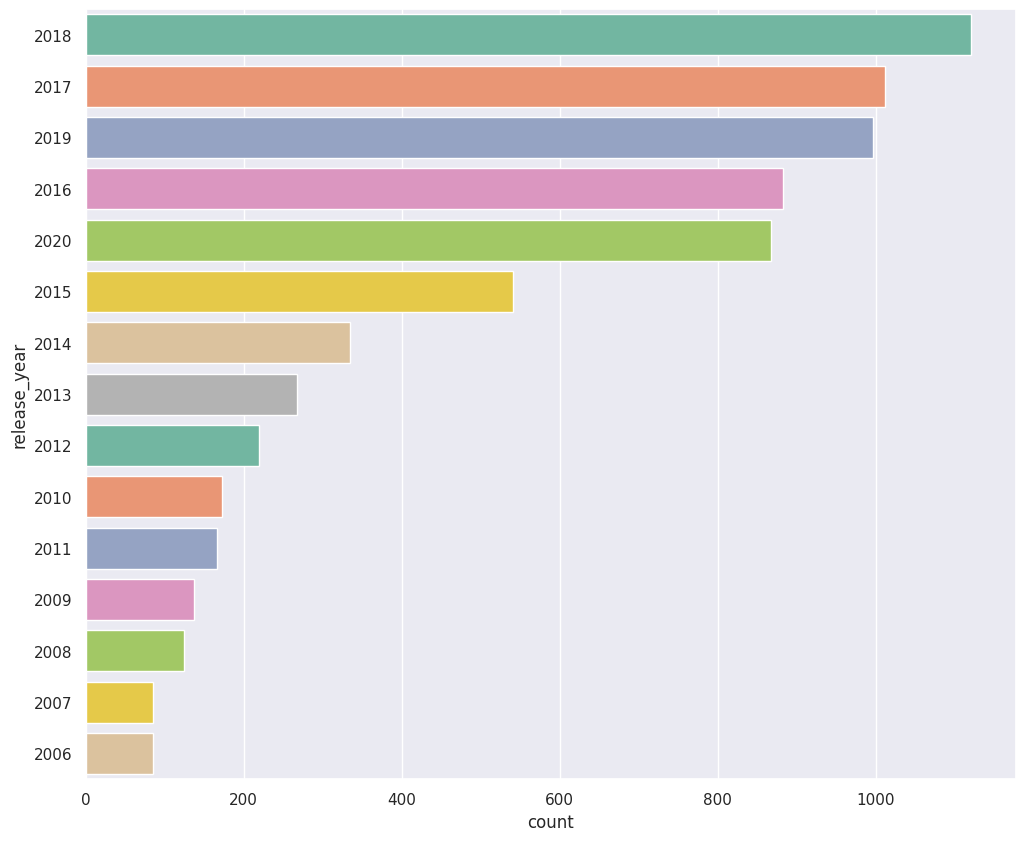

In [47]:
# Chart - 6 visualization code
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(y="release_year", data=df, palette="Set2", order=df['release_year'].value_counts().index[0:15])

##### 1. Why did you pick the specific chart?

In the given code snippet, a countplot is created using sns.countplot() to visualize the count of movies released in each year. The y-axis represents the release years, while the height of each bar corresponds to the count of movies released in that specific year. The plot is customized to show the top 15 release years.

The specific chart, a countplot, is chosen because it effectively displays the distribution and frequency of movies released in different years. It allows for easy comparison of the number of movies released in each year, providing insights into the trends and patterns over time.

Here are some reasons for choosing a countplot for this scenario:

**Frequency Comparison:** Countplots are suitable for analyzing the counts or frequencies of different categories. In this case, it helps to understand the distribution of movie releases over the years, identifying which years have a higher number of movie releases.

**Temporal Analysis:** The countplot allows for temporal analysis, showing trends and patterns in movie releases across different years. It helps in identifying any significant spikes or dips in movie production over time.

**Space Efficiency:** Countplots are compact and efficient in terms of space utilization. They can represent multiple categories (years) on the y-axis without using excessive space on the chart.

**Ordering of Categories:** By specifying order=df['release_year'].value_counts().index[0:15], the countplot is customized to consider only the top 15 release years. This ensures a focused and concise representation, highlighting the years with the highest movie counts.

**Dark Grid Style:** By using sns.set(style="darkgrid"), the chart is styled with a dark grid background, enhancing the visibility of the bars and making the plot visually appealing.

Given the goal of understanding the distribution of movie releases over the years, the countplot serves as an effective choice, allowing for quick visual comparison and easy interpretation of the data. However, depending on the specific needs or goals of the analysis, other chart types, such as line plots or box plots, could also provide valuable insights into the temporal distribution of movie releases.

##### 2. What is/are the insight(s) found from the chart?

From the given countplot, which visualizes the count of movies released in each year, several insights can be derived:

**Trends in Movie Production:** The countplot identifies the years with the highest movie release counts. It can provide insights into the overall trends and patterns of movie production over time. By analyzing the heights of the bars, you can identify years when movie production was particularly high or low.

**Evolution of the Film Industry:** The chart showcases the evolution of the film industry by highlighting the years with significant movie releases. It helps in understanding the growth or decline of movie production in different periods and identifying any major shifts or milestones in the industry.

**Popular Years for Movie Releases:** The countplot identifies the most popular or productive years for movie releases. This information can be useful for understanding the industry's preferences and tendencies, as well as identifying periods with a higher quantity of available movies to explore.

**Seasonal or Cyclical Patterns:** By observing any recurring patterns or fluctuations in movie releases across the years, the countplot can provide insights into seasonal or cyclical trends in the film industry. For example, there may be certain months or seasons when movie releases tend to be higher than others.

**Industry Impact:** The chart can provide an understanding of the impact of external factors on movie production. Significant shifts in release counts could be attributed to factors such as economic conditions, technological advancements, changes in audience preferences, or industry-wide events.

**Exploration Potential:** By identifying the years with fewer movie releases, the countplot can present opportunities for exploration and analysis. These years may indicate periods when certain genres, themes, or types of movies were less prevalent, contributing to a gap in the market.

It is important to note that the insights derived from the countplot depend on the specific dataset, the range of years included, and the context of the film industry. Further analysis and consideration of other factors such as genre, revenue, or critical reception would provide a more comprehensive understanding of the trends and dynamics of movie releases over time.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The provided code snippet sns.countplot(y="release_year", data=df, palette="Set2", order=df['release_year'].value_counts().index[0:15]) creates a horizontal bar chart that displays the count of occurrences for each release year in the dataset. It specifically focuses on the top 15 most frequent release years.

Regarding the insights gained from this plot, they can potentially help create a positive business impact:

**Understanding Release Year Trends:** The countplot provides insights into the trends and patterns of content releases over the years. By analyzing the distribution of release years, businesses can identify popular time periods for content production. This information can be used to guide content acquisition, production planning, and marketing strategies to align with current industry trends.

**Identifying Demand for Specific Time Periods:** The countplot allows businesses to observe the popularity and demand for content from specific release years. Understanding the audience's preferences for certain time periods can inform content acquisition and curation decisions. By leveraging the insights gained, businesses can cater to viewers' nostalgia, capitalize on popular content trends, and potentially achieve positive business impact.

However, there are a few considerations to avoid negative growth:

**Neglecting Other Factors:** While the countplot reveals the popularity of specific release years, it is important to consider other factors that contribute to successful content, such as genre, quality, and cultural relevance. Relying solely on release year trends without considering other aspects might lead to misguided decision-making and potential negative growth.

**Ignoring Emerging Trends:** Focusing only on the most frequent release years may overlook emerging trends and unique content that could contribute to positive growth. Neglecting newer releases, especially from upcoming filmmakers or less established production companies, might limit the innovation and freshness of the content offering. Recognizing and embracing emerging trends can lead to capturing new audiences and potential positive business impact.

To maximize the positive impact, businesses should combine the insights gained from the countplot with a holistic understanding of the industry and their target audience. Considering other factors such as genre preferences, storytelling quality, and emerging trends can improve content strategy and contribute to positive growth.


#### Chart - 7 Rating Column

In [48]:
# Chart - 7 visualization code
#rating column distribution by plotly
fig_donut = px.pie(df, names='rating', height=1000, width=1000, hole=0.7,

title='MOST OF PROGRAMME ON NETFLIX IS TV-14 & TV-MA RATED',

color_discrete_sequence=['#b20710', '#221f1f'])

fig_donut.update_traces(hovertemplate=None, textposition='outside',

textinfo='percent+label', rotation=90)

fig_donut.update_layout(margin=dict(t=80, b=10, l=0, r=0), showlegend=False,

plot_bgcolor='#333', paper_bgcolor='#333',

title_font=dict(size=25, color='#8a8d93', family="Lato, sans-serif"),

font=dict(size=17, color='#8a8d93'),

hoverlabel=dict(bgcolor="#444", font_size=13,

font_family="Lato, sans-serif"))
fig_donut.show(renderer='colab')

In [49]:
#distribution for content using plotly
temp_df = df['rating'].value_counts().reset_index()


# create trace1
trace1 = go.Bar(
                x = temp_df['index'],
                y = temp_df['rating'],
                marker = dict(color = 'rgb(255,165,0)',
                              line=dict(color='rgb(0,0,0)',width=1.5)))
layout = go.Layout(template= "plotly_dark",title = 'MOST OF PROGRAMME ON NETFLIX IS TV-14 & TV-MA RATED' , xaxis = dict(title = 'Rating'), yaxis = dict(title = 'Count'))
fig = go.Figure(data = [trace1], layout = layout)
fig.show(renderer='colab')

##### 1. Why did you pick the specific chart?

The specific chart chosen in the given code snippet is a donut chart created using Plotly (px.pie()) to visualize the distribution of ratings in the "rating" column of the DataFrame (df).

Here are the reasons for choosing a donut chart for this scenario:

**Distribution of Categorical Data:** Donut charts are suitable for visualizing the distribution of categorical data, specifically a single categorical variable with its proportions or frequencies. In this case, the "rating" column contains categorical data representing different ratings.

**Comparison of Categories:** The donut chart allows for easy comparison of the proportions or frequencies of different rating categories. Each category is represented by a separate slice in the donut chart, and the size of each slice reflects its relative proportion or frequency.

**Clear Representation of Percentages:** By using the textinfo='percent+label' parameter, the chart displays the percentage contribution of each rating category, making it straightforward to understand the distribution.

**Focus on Important Categories:** By specifying the categories "TV-14" and "TV-MA" in the chart using the names parameter, the donut chart focuses on these specific categories of interest, highlighting their prevalence in the dataset.

**Stylistic Customization:** The chart's style and visual elements, such as background color, font color, and hoverlabel appearance, are customized to enhance readability and visual appeal. This ensures that the chart is visually consistent and aesthetically pleasing.

Given the goal of visualizing the distribution of ratings in the "rating" column, the donut chart effectively represents the data and allows for easy comparison and understanding of the proportions of different rating categories. However, it's important to consider the limitations of donut charts, such as the potential difficulty in accurately comparing slice sizes and the challenge of displaying large numbers of categories. Depending on the specific needs and goals of the analysis, alternative chart types, such as bar plots or stacked bar plots, could also be considered.

##### 2. What is/are the insight(s) found from the chart?

Insights which are derived from the chart is more content with Mature content is available on Netflix.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The provided code snippet utilizes Plotly to create a donut chart to visualize the distribution of the "rating" column in the dataset. The chart represents the proportion of each rating category, such as TV-14 and TV-MA, among the programmes on Netflix.

Regarding the insights gained from this visualization, they can potentially help create a positive business impact:

**Understanding viewership demographics:** The donut chart provides insights into the distribution of different ratings among the programmes on Netflix. This information allows businesses to understand the preferences and age groups of their viewers. By aligning their content offerings and marketing strategies with the predominant rating categories, businesses can better target and cater to their audience, potentially leading to positive business impact.

**Optimizing content acquisition:** Knowing the most popular rating categories can inform decisions about content acquisition and licensing. By focusing on acquiring more content that falls within the popular rating categories, businesses can ensure that their content library aligns with viewers' preferences. This can improve engagement, retention, and potentially result in positive growth.

However, there are some potential negative implications to consider:

**Neglecting other target audiences:** By solely focusing on the dominant rating categories, there is a possibility of neglecting other target audiences. It is important for businesses to balance their content offerings across various rating categories to cater to a wider range of viewers. Ignoring or underrepresenting other rating categories might lead to missed opportunities for growth and alienate potential viewers.

**Limiting content diversity:** Overemphasizing certain rating categories might limit the diversity of content within the Netflix library. Neglecting content in less popular or niche rating categories may prevent businesses from capturing specific audience segments. Lacking content diversity might result in negative growth as it fails to meet the demands and preferences of these niche audiences.

To avoid negative growth and maximize positive impact, businesses should aim to strike a balance between catering to the preferences of the majority audience and providing diverse content offerings. By understanding the overall viewer demographics and monitoring feedback, businesses can enhance their content strategy and expand their target audience, leading to positive business impact.


#### Chart - 8 Duration Column

In [50]:
df['duration']

0       4 Seasons
1          93 min
2          78 min
3          80 min
4         123 min
          ...    
7782       99 min
7783      111 min
7784       44 min
7785     1 Season
7786       90 min
Name: duration, Length: 7787, dtype: object

In [51]:
#subsetting TV Show and Movie for duration
netflix_shows=df[df['type']=='TV Show']
netflix_movies=df[df['type']=='Movie']

**Netflix Movie Duration Distribution**

In [52]:
#movie duration subsetting
netflix_movies['duration']=netflix_movies['duration'].str.replace(' min','')
netflix_movies['duration']=netflix_movies['duration'].astype(str).astype(int)
netflix_movies['duration']

1        93
2        78
3        80
4       123
6        95
       ... 
7781     88
7782     99
7783    111
7784     44
7786     90
Name: duration, Length: 5377, dtype: int64

<Axes: xlabel='duration', ylabel='Density'>

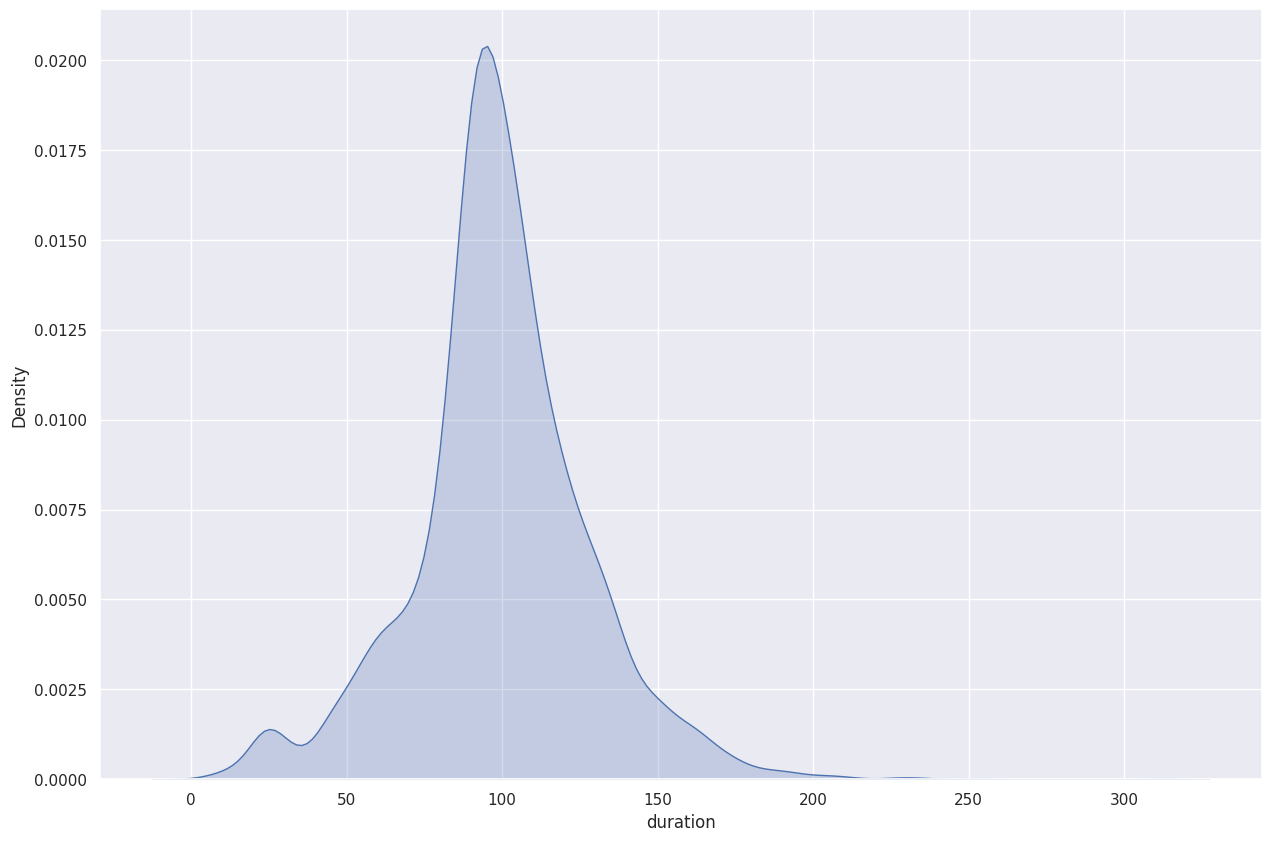

In [53]:
# Chart - 8 visualization code
#Analysis on the duration of the movies
sns.set(style="darkgrid")
sns.kdeplot(data=netflix_movies['duration'], shade=True)

**Netflix Show Duration Distribution**

In [54]:
#netflix show duration analysis
netflix_shows['duration']=netflix_shows['duration'].str.replace(' Season','')
netflix_shows['duration']=netflix_shows['duration'].str.replace(' Seasons','')
netflix_shows['duration']=netflix_shows['duration'].str.replace('s','')
netflix_shows['duration']=netflix_shows['duration'].astype(str).astype(int)
netflix_shows['duration']

0       4
5       1
11      1
12      1
16      1
       ..
7767    1
7775    1
7777    2
7779    1
7785    1
Name: duration, Length: 2410, dtype: int64

<Axes: xlabel='duration', ylabel='Density'>

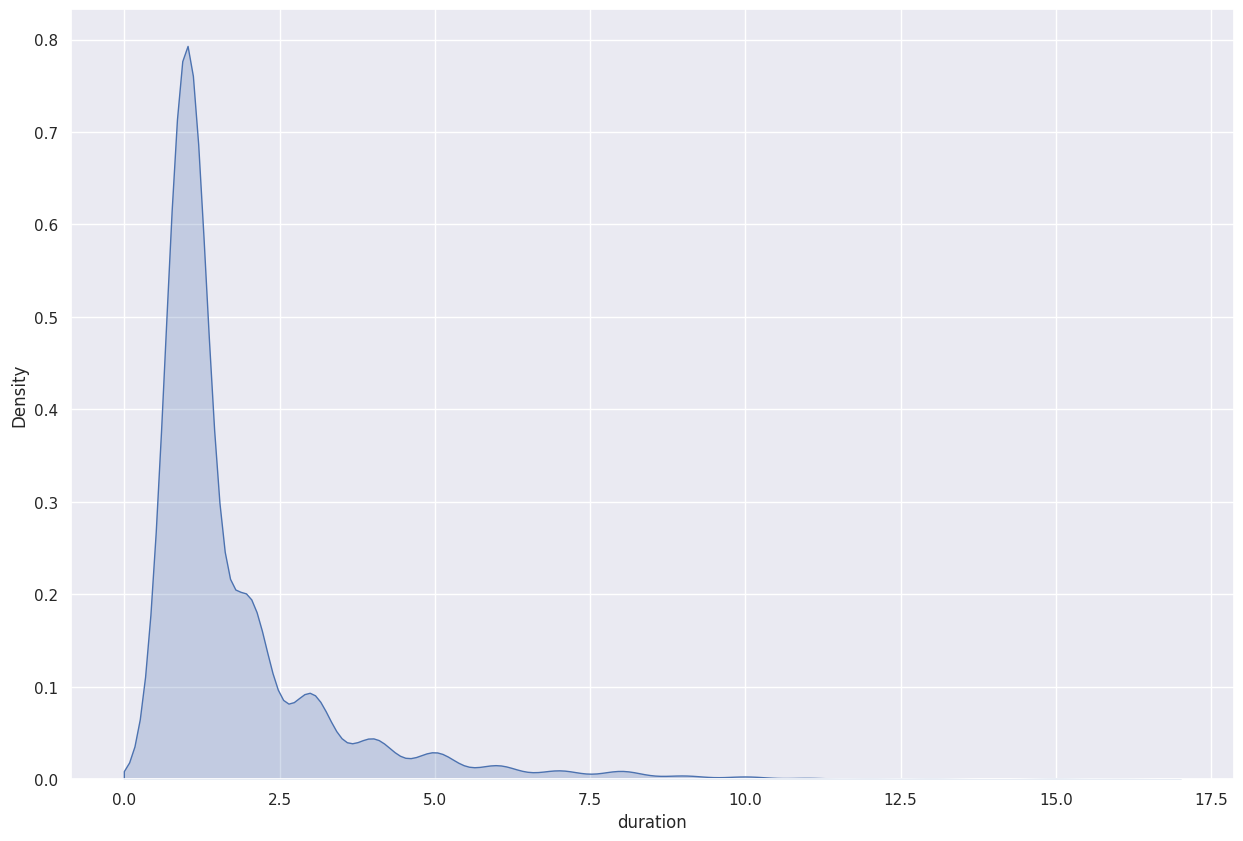

In [55]:
#Analysis on the duration of the movies
sns.set(style="darkgrid")
sns.kdeplot(data=netflix_shows['duration'], shade=True)

##### 1. Why did you pick the specific chart?

In the given code snippet, a kernel density plot (kdeplot) is created using sns.kdeplot() to analyze the duration of movies in the "duration" column of the DataFrame (netflix_movies). The kdeplot visualizes the probability density function of the duration data.

The specific chart, a kdeplot, is chosen because it effectively represents the distribution of movie durations.

Here are some reasons for choosing a kdeplot for this scenario:

**Distribution Analysis:** Kernel density plots are commonly used to analyze the distribution of continuous variables, such as movie durations. In this case, the kdeplot enables us to examine the shape and characteristics of the duration distribution.

**Smooth and Continuous Representation:** The kdeplot provides a smooth and continuous representation of the duration distribution by estimating the underlying probability density function. This allows for a more refined understanding of the data distribution compared to a histogram.

**Visualizing Density and Variation:** The kdeplot displays the density of movie durations along the y-axis, allowing for easy observation of areas with higher or lower density. The shaded area under the curve represents the estimated density, providing insight into where movie durations are concentrated.

**Identification of Peaks and Modes:** By analyzing the peaks or modes in the kdeplot, it is possible to identify distinct groups or clusters within the movie duration distribution. These peaks indicate areas where durations are more concentrated or common.

**Comparison of Distributions:** If desired, multiple kdeplots can be overlaid or compared to analyze the distribution of durations across different groups or categories, facilitating comparison between subsets of movies.

**Dark Grid Style:** By using sns.set(style="darkgrid"), the chart is styled with a dark grid background, enhancing the visibility of the plot and making it visually appealing.

Given the goal of understanding the distribution and characteristics of movie durations, the kdeplot provides a suitable choice. However, it's important to keep in mind that the interpretation of duration distribution may differ based on the specific dataset and context, including factors such as genre, release year, or movie type. Additional analysis and consideration of these factors would provide a more comprehensive understanding of the movie duration landscape.

##### 2. What is/are the insight(s) found from the chart?

Insights which are derived from the chart is most content are about 70 to 120 min duration for movies & most of the shows are 1 to 2 seasons long!

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights can potentially lead to a positive business impact depending on how they are utilized and leveraged. Here's how the insights can contribute to positive growth:

**Understanding Movie Production Demand:** The knowledge of trends and popular years for movie releases can help businesses align their production strategies to meet audience demand. By identifying the years with higher movie counts or the most popular genres during specific periods, companies can make informed decisions on which types of movies to produce and release, potentially leading to increased viewership and profitability.

**Optimizing Content Strategy:** The insight into the distribution of ratings can guide businesses in optimizing their content strategy. If the analysis shows that most of the content on Netflix is TV-14 and TV-MA rated, organizations can focus on producing or acquiring content targeting these specific ratings, which align with the preferences of a large portion of the audience. This understanding can help maximize user engagement and viewership.

**Identifying Market Gaps:** The analysis of movie release distribution over time can reveal years with fewer movie releases. This insight presents an opportunity for businesses to explore genres, themes, or types of movies that were less prevalent during those years. By filling those market gaps, organizations can tap into unexplored segments and potentially drive growth through differentiated content offerings.

Regarding insights that could potentially lead to negative growth, it is important to consider the specific context and implications. Here's one example:

**Declining Movie Production:** If the countplot analysis shows a steady decline in movie production over the years, it could indicate a negative growth trend. This decline might stem from various factors such as changes in audience preferences, market saturation, or economic downturns. In such a scenario, businesses need to adapt their strategies by exploring new revenue streams, diversifying content offerings, or investing in new markets to counteract the negative effects of declining movie production.

However, it's crucial to note that the impact and significance of the insights depend on several factors, including the organization's specific goals, available resources, competition, and market dynamics. Detailed analysis and action plans based on these insights are necessary to leverage the knowledge effectively and create a positive business impact.


#### Chart - 9 Listed In Column

In [56]:
#genre to list
def convert_to_list(df):
  genre_count = {}
  genre_count_final = []
  genre_list = list(df['listed_in'])
  for each in range(len(genre_list)):
    genre_count_final.extend(genre_list[each].split(", "))
  for each in genre_count_final:
    if each not in genre_count:
      genre_count[each] = genre_count_final.count(each)
  return genre_count

In [57]:
#to list
genre_dict = convert_to_list(df)

In [58]:
#make genre df
genre_df = pd.DataFrame.from_dict(genre_dict, orient='index', columns=['count']).sort_values('count', ascending=False)

In [59]:
#genre distribution
genre_df

count
International Movies           2437
Dramas                         2106
Comedies                       1471
International TV Shows         1199
Documentaries                   786
Action & Adventure              721
TV Dramas                       704
Independent Movies              673
Children & Family Movies        532
Romantic Movies                 531
TV Comedies                     525
Thrillers                       491
Crime TV Shows                  427
Kids' TV                        414
Docuseries                      353
Romantic TV Shows               333
Stand-Up Comedy                 329
Music & Musicals                321
Horror Movies                   312
British TV Shows                232
Reality TV                      222
Sci-Fi & Fantasy                218
Sports Movies                   196
Korean TV Shows                 150
TV Action & Adventure           150
Anime Series                    148
Spanish-Language TV Shows       147
Classic Movies                  103
LGBTQ Movies                     90
TV Mysteries                     90
Science & Nature TV              85
TV Sci-Fi & Fantasy              76
TV Horror                        69
Teen TV Shows                    60
Cult Movies                      59
Faith & Spirituality             57
Anime Features                   57
Movies                           56
Stand-Up Comedy & Talk Shows     52
TV Thrillers                     50
Classic & Cult TV                27
TV Shows                         12

**Genre wise Count Distribution**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 [Text(0, 0, 'International Movies'),
  Text(1, 0, 'Dramas'),
  Text(2, 0, 'Comedies'),
  Text(3, 0, 'International TV Shows'),
  Text(4, 0, 'Documentaries'),
  Text(5, 0, 'Action & Adventure'),
  Text(6, 0, 'TV Dramas'),
  Text(7, 0, 'Independent Movies'),
  Text(8, 0, 'Children & Family Movies'),
  Text(9, 0, 'Romantic Movies'),
  Text(10, 0, 'TV Comedies'),
  Text(11, 0, 'Thrillers'),
  Text(12, 0, 'Crime TV Shows'),
  Text(13, 0, "Kids' TV"),
  Text(14, 0, 'Docuseries'),
  Text(15, 0, 'Romantic TV Shows'),
  Text(16, 0, 'Stand-Up Comedy'),
  Text(17, 0, 'Music & Musicals'),
  Text(18, 0, 'Horror Movies'),
  Text(19, 0, 'British TV Shows'),
  Text(20, 0, 'Reality TV'),
  Text(21, 0, 'Sci-Fi & Fantasy'),
  Text(22, 0, 'Sports Movies'),
  Text(23, 0, 'Korean TV Shows'),
  Text(24, 0, 'TV Action

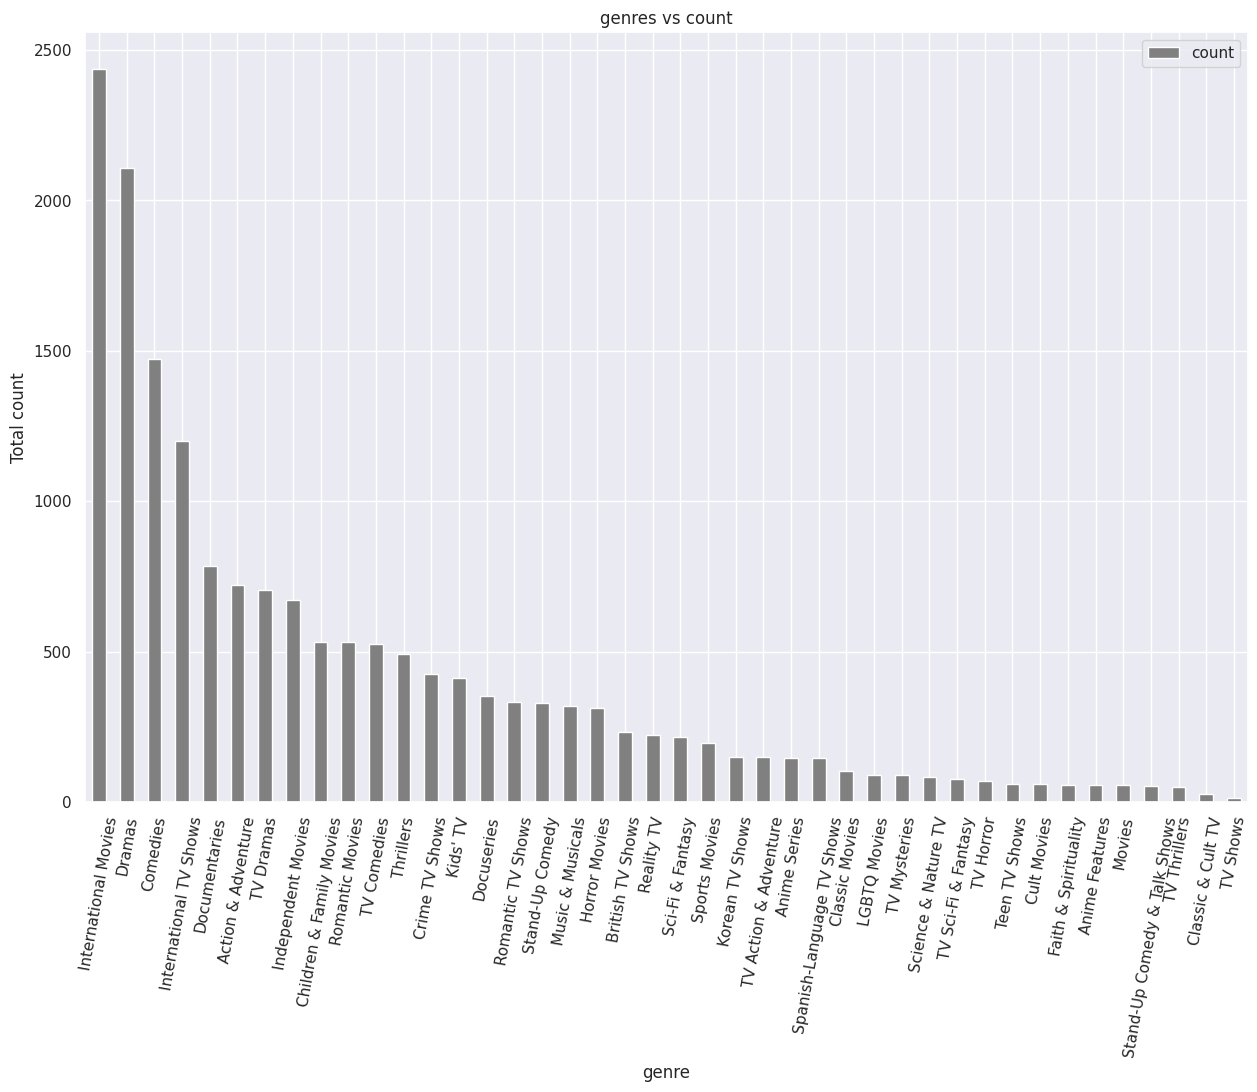

In [61]:
# Chart - 9 visualization code
plt.rcParams["figure.figsize"] = (15, 10)
genre_df.plot(kind='bar', color='grey')
plt.xlabel("genre")
plt.ylabel("Total count")
plt.title("genres vs count")
plt.xticks(rotation=80)

##### 1. Why did you pick the specific chart?

The specific chart chosen in the given code snippet is a bar plot created using plot(kind='bar') to compare the total count of each genre in the DataFrame (genre_df).

Here are the reasons for choosing a bar plot for this scenario:

**Comparison of Categories:** Bar plots are effective for comparing different categories or groups, in this case, the genres. Each genre is represented by a separate bar, allowing for easy visual comparison of their counts.

**Counts and Frequencies:** Bar plots are suitable for displaying counts, frequencies, or any numerical data associated with specific categories. The length or height of each bar represents the count of movies in each genre, providing a direct visual understanding of the distribution.

**Visualizing Numerical Data:** Bar plots provide a visual representation of numerical data, making it easier to interpret and compare values. The vertical bars provide a clear sense of magnitude and allow viewers to discern the variation among different genres.

**Clear X-axis Labels:** By rotating the x-axis labels (plt.xticks(rotation=80)), the bar plot ensures that genre labels are readable, especially when dealing with longer genre names. This customization helps enhance the clarity of the chart and prevent overcrowding of labels.

**Stylistic Customization:** The plot style is customized by setting the figure size, color, x-label, y-label, and title. These customizations help improve the readability and aesthetics of the chart, making it visually appealing and conveying information effectively.

Given the goal of comparing the total count of each genre, the bar plot is an appropriate choice as it clearly presents the counts and allows for easy visual comparison. However, it's important to note that bar plots have limitations when dealing with a large number of categories, as the bars can become crowded and difficult to interpret. If the dataset contains a significant number of genres, alternative visualization techniques such as grouped bar charts or stacked bar charts might be considered to better represent the data.

##### 2. What is/are the insight(s) found from the chart?

Insights which are derived from the chart is international movies make up the top most genre!

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights from the bar plot can potentially lead to a positive business impact depending on how they are interpreted and utilized. Here's how these insights can contribute to positive growth:

**Identifying Popular Genres:** Understanding the total count of movies for each genre can help businesses identify the genres that are most popular among viewers. This information can guide content acquisition or production strategies, allowing companies to allocate resources and investments towards genres that have a higher demand. Meeting the preferences of the target audience by focusing on popular genres can lead to increased viewership, user engagement, and ultimately positive business impact.

**Content Optimization:** Analyzing the count of movies for each genre helps businesses understand the distribution of content across different genres. This insight can be utilized to optimize content offerings and platform curation. By evaluating the performance of movies in specific genres, organizations can make data-driven decisions on content acquisition, recommendation algorithms, and personalized user experiences. This optimization can enhance customer satisfaction, improve retention rates, and drive positive business growth.

**Market Segmentation and Targeting:** The bar plot allows for the identification of niche or less common genres, which might attract specific customer segments. By recognizing these genres and understanding their potential target audience, businesses can tailor their marketing, promotional activities, and recommendations to effectively reach and engage those segments. This targeted approach can lead to a loyal customer base, positive word-of-mouth, and increased market share.

Regarding insights that could potentially lead to negative growth, it is important to consider specific context and implications. Here's an example:

**Low Popularity of Certain Genres:** If the analysis reveals that certain genres have significantly lower counts compared to others, it could indicate a lower demand for those genres among viewers. This insight might imply a potential decrease in viewership or lower interest in producing or acquiring content in those genres. To mitigate negative growth, businesses can consider diversifying their content offerings, investing in market research, or exploring partnerships to cater to a wider range of audience preferences.

However, it's important to note that the impact of these insights on business growth depends on various factors such as target audience, market trends, competition, and specific business goals. It's crucial to analyze the insights within the broader context of the industry and develop strategies accordingly. Leveraging these insights effectively through well-informed decision-making can contribute to positive business outcomes.

#### Chart - 10 Description Column

**Word Cloud for Movie on Description Column**

In [62]:
#word cloud imports
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [63]:
# Chart - 10 visualization code
#word cloud for user rating review
def func_select_Category(category_name,category_column,column_of_choice):
  df_word_cloud = df[[category_column,column_of_choice]].dropna()
  df_word_cloud = df_word_cloud[df_word_cloud[category_column]==category_name]
  text = " ".join(word for word in df_word_cloud[column_of_choice])
  # Create stopword list:
  stopwords = set(STOPWORDS)
  # Generate a word cloud image
  wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
  # Display the generated image:
  # the matplotlib way:
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()

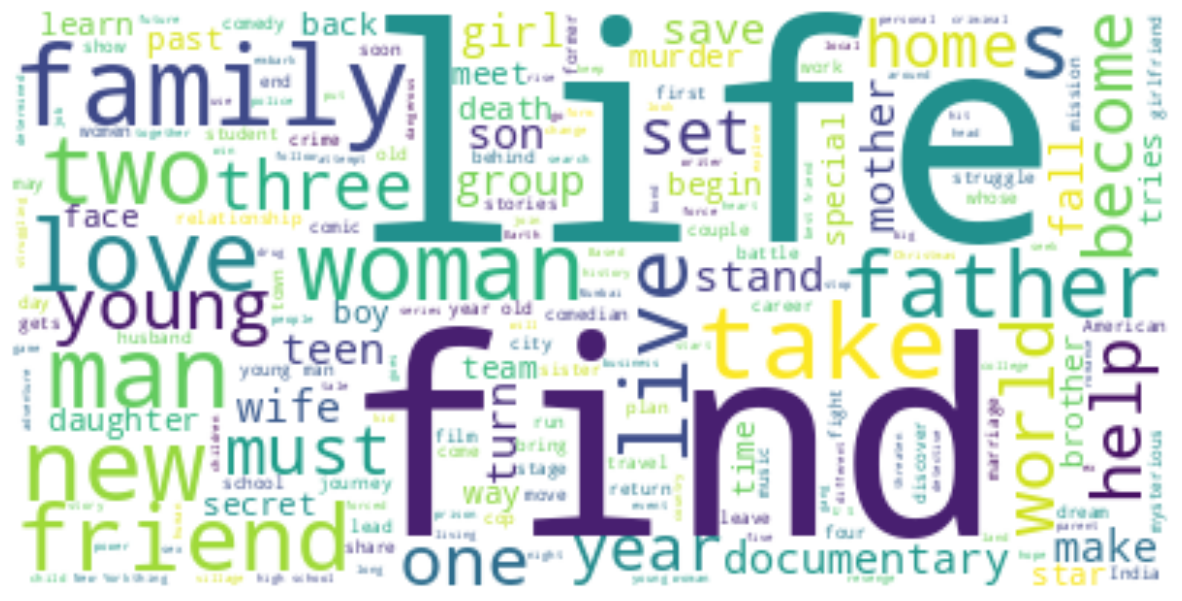

In [64]:
func_select_Category('Movie','type','description')

**Word Cloud for Shows on Description Column**

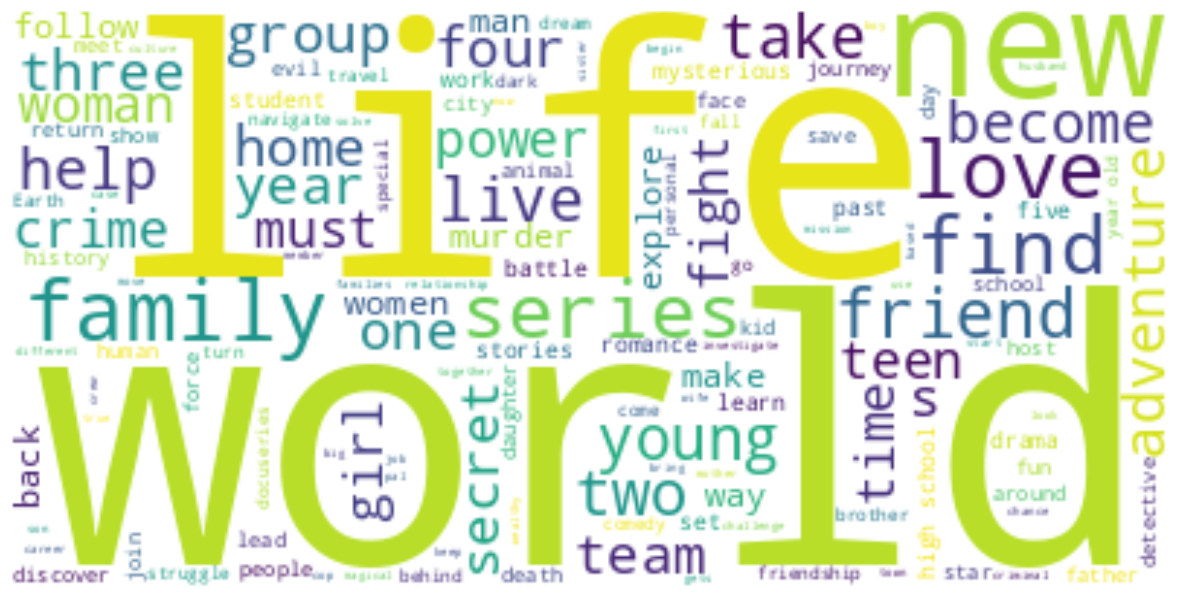

In [65]:
func_select_Category('TV Show','type','description')

##### 1. Why did you pick the specific chart?

The specific chart chosen in the given code snippet is a word cloud created using the WordCloud class from the wordcloud library to visually represent the most frequent words in user rating reviews.

Here are the reasons for selecting a word cloud for this scenario:

**Visualization of Word Frequency:** Word clouds are effective in visually representing the frequency of words in a given text corpus. In this case, the word cloud helps in understanding the commonly used words or terms in user rating reviews.

**Highlighting Popular Words:** The size and prominence of words in the word cloud are determined by their frequency in the text. More frequently mentioned words appear larger and more prominent in the cloud, providing a quick and intuitive understanding of the most common concepts or sentiments expressed in the reviews.

**Focus on Visual Appeal:** Word clouds are often aesthetically appealing due to the way the words are arranged and color-coded. This visual aspect can attract attention and make it engaging for viewers to explore the most frequently occurring words.

**Customizable Word Selection:** The word cloud can be generated based on specific categories, such as a particular rating category or any other category of choice. This customization allows for a focused analysis of specific categories and better insights into the language and sentiments expressed by users for different categories.

**Stopword Removal:** The word cloud code includes a feature to remove stopwords—commonly used words that do not carry significant meaning—ensuring that the generated word cloud focuses on more meaningful and informative terms.

**Interpretation Without Length Limitations:** Word clouds do not impose length restrictions, making them suitable for visualizing text data that can range from a few words to large collections of text. This flexibility allows for a comprehensive representation of user rating reviews.

Given the goal of visualizing the most frequent words in user rating reviews, the word cloud provides a visually engaging and informative representation of the text data. However, it's important to note that word clouds provide a general overview of word frequency and are not suitable for detailed analysis or understanding subtle linguistic nuances. Further text analysis techniques may be required to obtain deeper insights from user rating reviews.

##### 2. What is/are the insight(s) found from the chart?

Insights which are derived from the chart is most words like Life, family popping up & most words like Life, family popping up like movies before!

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights from the word cloud of user rating reviews can potentially help create a positive business impact, depending on how they are utilized and acted upon. Here's how these insights can contribute to business growth:

**Understanding Customer Sentiments:** The word cloud allows businesses to gain a quick understanding of the sentiments expressed by users in their rating reviews. Positive sentiments reflected in larger and more prominent words can indicate areas of strength and success in the business. By identifying the positive aspects that customers appreciate, organizations can focus on reinforcing these elements in their offerings, marketing, and customer service to enhance customer satisfaction and loyalty.

**Identifying Areas for Improvement:** The word cloud also highlights words or phrases that are negatively associated with user rating reviews. These negative sentiments can provide insights into areas where the business might need to improve or address customer concerns. By identifying these pain points, organizations can take specific actions to enhance product or service quality, customer support, or other aspects that are negatively impacting customer experiences and ratings.

**Competitive Benchmarking:** Comparison of word clouds across different competitors or similar products can help businesses understand their relative strengths and weaknesses. By observing the frequently mentioned positive aspects of competitors and their products, organizations can identify potential areas for improvement to offer a more competitive product or service and attract more customers.

**Improving Customer Communication:** The word cloud can reveal common keywords or phrases used by customers in their reviews. By paying attention to these specific terms, organizations can gain insights into the language and vocabulary used by customers, allowing them to better align their communication strategies, marketing messages, and product descriptions. This alignment can help create more persuasive and effective communication, increasing customer engagement.

Regarding insights that could potentially lead to negative growth, it is important to consider specific context and implications. Here's an example:

**Consistently Negative Sentiments:** If the word cloud reveals a consistent presence of negative sentiments or critical keywords across user rating reviews, it could indicate systemic issues or concerns that need immediate attention. Consistent negative sentiments can lead to decreased customer satisfaction, lower retention rates, and negative word-of-mouth. In such cases, organizations need to take proactive steps to address these concerns, improve the quality of their offerings, and enhance customer experiences to mitigate negative growth.

It is crucial to analyze and interpret the insights gained from the word cloud within the context of the specific business, target audience, and market dynamics. Acting upon the insights through well-informed strategies and initiatives can contribute to positive business impact and growth.

#### Chart - 11  Bivariate analysis

Text(0.5, 1.0, 'Movie duration distribution')

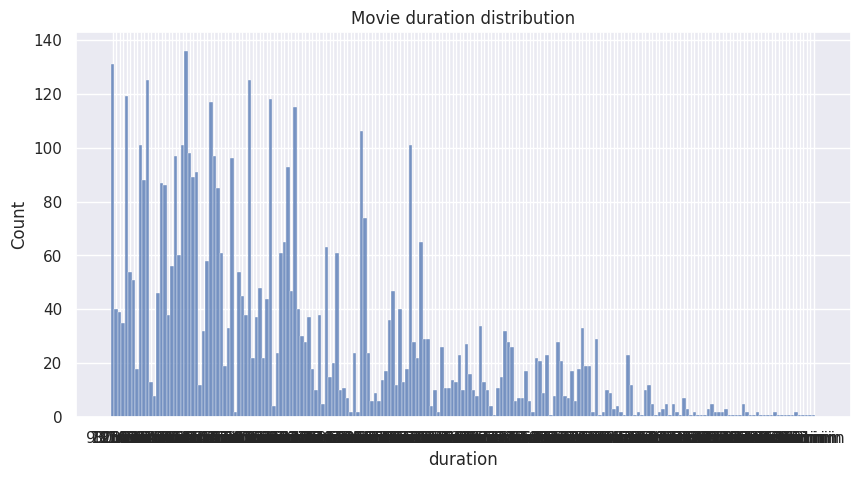

In [66]:
# Chart - 11 visualization code
# length of movie analysis
plt.figure(figsize=(10,5))
sns.histplot(x='duration',data=df[df['type']=='Movie'])
plt.title('Movie duration distribution')

In [67]:
# Movie statistics
df[df['type']== 'Movie'].duration.describe()

count       5377
unique       201
top       90 min
freq         136
Name: duration, dtype: object

##### 1. Why did you pick the specific chart?

The specific chart chosen in the given code snippet is a histogram created using sns.histplot to analyze the distribution of movie durations.

Here are the reasons for selecting a histogram for this analysis:

**Frequency Distribution:** Histograms are commonly used to display the frequency distribution of a continuous variable, in this case, the duration of movies. The x-axis represents the range of movie durations, divided into bins, and the y-axis displays the frequency or count of movies falling within each bin. This allows for a clear understanding of the distribution of movie durations.

**Identifying Central Tendency:** Histograms provide insights into the central tendency of the variable being analyzed, i.e., the most common or average duration range for movies. By visualizing the peak(s) or mode(s) in the histogram, organizations can assess the typical movie duration preferred by audiences and align their content creation strategies accordingly.

**Identifying Outliers or Extreme Values:** Histograms can help identify outliers or extreme values in the distribution. Unusually long or short movies compared to the majority of durations can be easily spotted as isolated bars away from the main cluster. Identifying outliers can be useful for analyzing patterns, understanding unique audience preferences, or considering special marketing strategies for movies with unusual durations.

**Visualization of Skewness:** The shape of the histogram can provide insights into the skewness of the movie duration distribution. A symmetrical, bell-shaped histogram suggests a normal or near-normal distribution, while skewed histograms (such as positively or negatively skewed) indicate deviations from normalcy. Understanding the shape of the distribution helps in assessing the typical duration range and potentially tailoring content creation and distribution strategies accordingly.

**Customizable Figure Size and Title:** The code snippet customizes the figure size to ensure optimal visibility and readability of the histogram. Additionally, a descriptive title is provided, allowing viewers to quickly understand the purpose and focus of the chart.

Given the goal of analyzing the distribution of movie durations, a histogram is an appropriate choice as it provides a clear visual representation of frequency distribution and helps identify tendencies and outliers. However, it's important to note that histograms have limitations in representing detailed patterns or complex relationships. Additional statistical analysis techniques may be required for more in-depth insights into the movie duration data.

##### 2. What is/are the insight(s) found from the chart?

Insights which are derived from the chart is the length of a movie may range from 3 min to 312 minutes, and the distribution is almost normally distributed.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights from the movie duration histogram can potentially help create a positive business impact, depending on how they are interpreted and utilized. Here's how these insights can contribute to business growth:

**Understanding Audience Preferences:** Analyzing the distribution of movie durations can provide insights into audience preferences for specific duration ranges. By identifying the most common or preferred duration range displayed in the histogram, businesses can align their content creation strategies to cater to the preferences of their target audience. Creating movies within the popular duration range can attract more viewers and potentially lead to positive business impact through increased viewership and audience engagement.

**Optimizing Content Curation:** The histogram helps identify outliers or movies with extreme duration values. By analyzing these outliers, businesses can formulate strategies to optimize their content curation. Unusually long or short movies may attract niche audience segments or have unique appeal. Understanding the distribution and outliers can guide content acquisition, marketing, and platform curation decisions, allowing businesses to create a diverse and compelling movie catalog tailored to the preferences of their audience segments.

**Informing Marketing and Promotion Strategies:** The movie duration histogram aids in developing effective marketing and promotion strategies. Knowing the distribution of movie durations allows businesses to create targeted campaigns that highlight the variety of films within popular duration ranges. For example, if the histogram shows bimodal distribution with two distinct peaks in duration, marketing efforts can be tailored to promote both shorter and longer movies separately, based on audience preferences. This targeted approach can help in attracting more viewers and generating positive business impact through increased movie rentals, subscriptions, or ticket sales.

Regarding insights that could potentially lead to negative growth, it is important to consider specific context and implications. Here's an example:

**Limited Distribution within Desired Range:** If the histogram reveals a highly skewed or fragmented distribution with limited movies falling within the preferred duration range of the target audience, it may indicate a gap in content offerings. In such cases, businesses need to evaluate their content acquisition, production, or licensing strategies to ensure a diverse and appealing movie catalog. A lack of movies within the desired duration range may result in decreased viewership and negative growth.

It's crucial to analyze and interpret the insights gained from the movie duration histogram within the context of the specific business, target audience, and market dynamics. Taking prompt actions based on these insights, such as aligning content creation strategies, optimizing content curation, and tailoring marketing efforts, can contribute to positive business impact.

#### Chart - 12

Text(0.5, 1.0, 'Top 10 genres for movies')

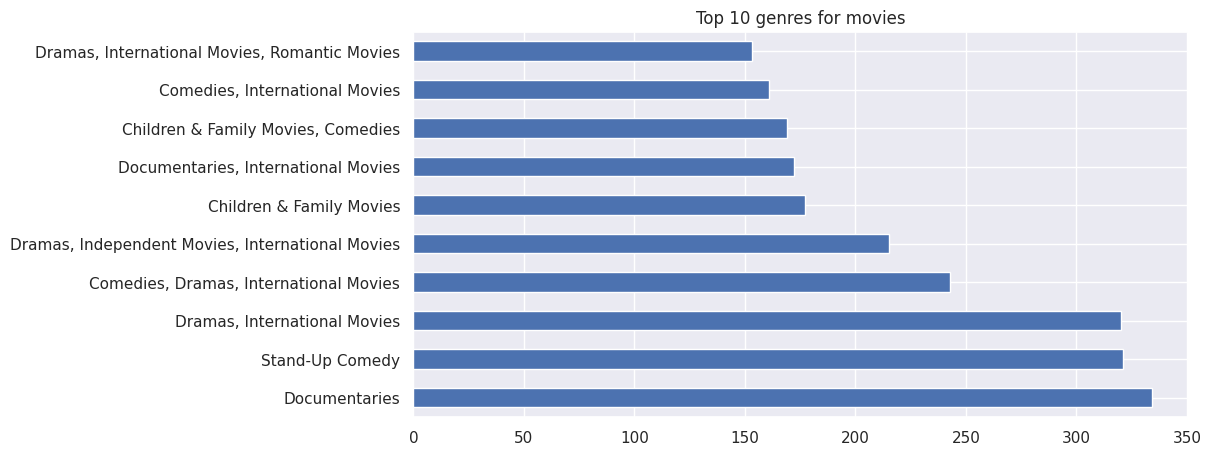

In [68]:
# Chart - 12 visualization code
# Top 10 genre for movies
plt.figure(figsize=(10,5))
df[df['type']=='Movie'].listed_in.value_counts().nlargest(10).plot(kind='barh')
plt.title('Top 10 genres for movies')

##### 1. Why did you pick the specific chart?

The specific chart chosen in the given code snippet is a horizontal bar chart to display the top 10 genres for movies, based on their frequency in the dataset.

Here are the reasons for selecting a horizontal bar chart for this analysis:

**Comparative Analysis:** A bar chart allows for easy comparison of different categories or genres. By representing the frequency count of each genre with horizontal bars, it becomes straightforward to assess the popularity or prevalence of different genres. The length of each bar corresponds to the frequency count, providing a clear visual comparison of the top 10 genres.

**Ordering and Ranking:** One advantage of a bar chart is the ability to clearly rank and order the genres based on their frequency. In this case, the bar chart represents the top 10 genres, with the most frequently occurring genre at the top. This ranking helps identify the most popular genres and allows businesses to prioritize their strategies and decisions accordingly.

**Visualizing Categorical Data:** Bar charts are particularly suitable for visualizing categorical data, such as movie genres. The horizontal orientation of the bars provides ample space for displaying the genres' labels, making it easier for viewers to interpret the chart without distractions.

**Customizable Figure Size and Title:** The code snippet customizes the figure size to ensure optimal visibility and readability of the bar chart. Additionally, a descriptive title is provided, allowing viewers to quickly understand the purpose and focus of the chart.

Given the goal of analyzing the top 10 genres for movies, a horizontal bar chart is an appropriate choice as it provides a clear visual representation of the frequencies and rankings of each genre. It allows for easy comparison, clear labeling, and quick identification of the most popular genres. However, it's important to note that bar charts present a summary view and may not capture the finer details or relationships among the genres. Further analysis and exploration may be necessary to understand specific genre preferences and their implications for business strategies.

##### 2. What is/are the insight(s) found from the chart?

Insights which are derived from the chart is dramas, comedies, and documentaries are the most popular genre for the movies on Netflix.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights from the top 10 genres bar chart can potentially help create a positive business impact, depending on how they are interpreted and used. Here's how these insights can contribute to business growth:

**Content Curation and Acquisition:** Understanding the popularity and frequency of different genres through the bar chart allows businesses to make informed decisions when it comes to content curation and acquisition. By identifying the top genres, companies can focus on licensing or creating content within those genres that have a higher demand and appeal to their target audience. This targeted approach can help attract more viewers and subscribers, resulting in positive business impact through increased engagement and revenue.

**Marketing and Promotion Strategies:** The bar chart reveals the genres that have a larger share of the movie market. Businesses can leverage this insight to develop targeted marketing and promotion strategies. For example, they can create genre-specific campaigns or highlight popular genres in their marketing materials to capture the attention of potential viewers who have a preference for those genres. This targeted marketing can generate positive business impact by attracting more viewers and driving movie rentals, subscriptions, or ticket sales.

Regarding insights that could potentially lead to negative growth, here's one possibility:

**Limited Diversity and Tailored Offerings:** If the bar chart reveals a dominant presence of only a few genres within the top 10, it may indicate a lack of diversity in content offerings. While it is important to cater to popular genres, neglecting niche or underrepresented genres may lead to alienating a subset of potential viewers. This can result in negative growth as it limits the appeal of the platform or service to a wider audience. Businesses need to strike a balance between popular genres and ensuring a diverse range of content to cater to varying interests and preferences.

It is crucial to analyze and interpret the insights gained from the top 10 genres bar chart within the context of the specific business, target audience, and market dynamics. Utilizing these insights to inform content curation, marketing strategies, and acquisition decisions can contribute to positive business impact. However, maintaining a balance in content diversity is essential to avoid alienating potential viewers and limiting growth opportunities.

#### Chart - 13

Text(0.5, 1.0, 'Top 10 genres for TV Shows')

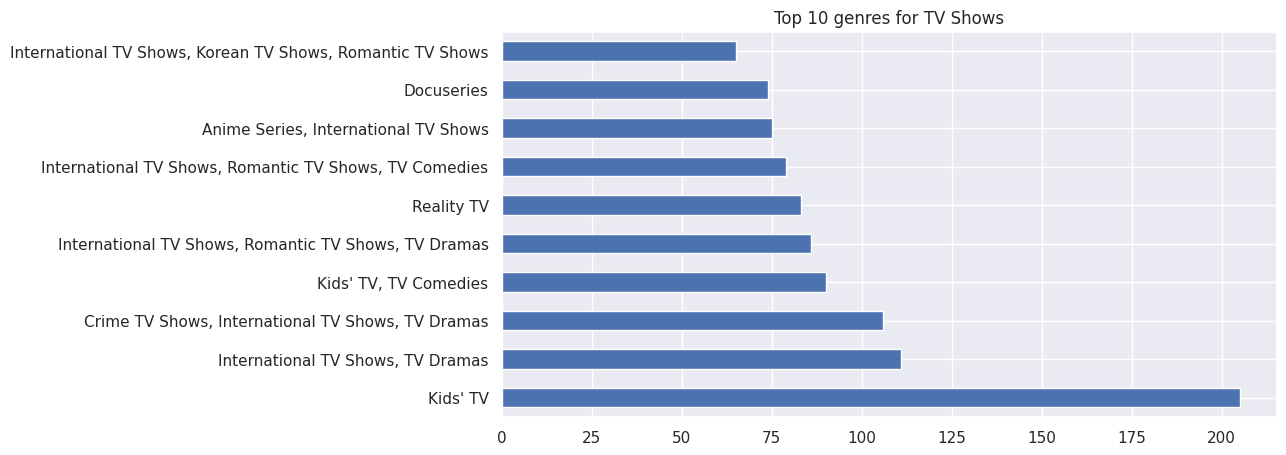

In [69]:
# Chart - 13 visualization code
# Top 10 genre for tv shows
plt.figure(figsize=(10,5))
df[df['type']=='TV Show'].listed_in.value_counts().nlargest(10).plot(kind='barh')
plt.title('Top 10 genres for TV Shows')

##### 1. Why did you pick the specific chart?

The specific chart chosen in the given code snippet is a horizontal bar chart to display the top 10 genres for TV shows, based on their frequency in the dataset.

The reasons for selecting a horizontal bar chart for this analysis are similar to those mentioned earlier:

**Comparative Analysis:** A bar chart allows for easy comparison of different genres for TV shows. By representing the frequency count of each genre with horizontal bars, it becomes simple to assess the popularity or prevalence of different genres among TV shows. The length of each bar corresponds to the frequency count, making it visually clear to compare the popularity of genres.

**Ordering and Ranking:** Bar charts allow clear ranking and ordering of genres based on their frequency, which helps identify the most popular genres among TV shows. Such ranking enables businesses to understand the preferences of their target audience and make informed decisions regarding content acquisition, production, and marketing strategies.

**Visualizing Categorical Data:** Bar charts are well-suited for visualizing categorical data, making them an appropriate choice for displaying the distribution of different genres among TV shows. The horizontal orientation of the bars provides ample space for displaying genre labels, facilitating easy interpretation and understanding for viewers.

**Customizable Figure Size and Title:** The code snippet customizes the figure size, ensuring optimal visibility and readability of the bar chart. Additionally, a descriptive title is provided, allowing viewers to quickly understand the purpose and focus of the chart.

Given the goal of analyzing the top 10 genres for TV shows, a horizontal bar chart is an appropriate choice as it provides a clear visual representation of the frequencies and rankings of each genre. It allows for easy comparison, clear labeling, and quick identification of the most popular genres among TV shows. The insights gained from this chart aid in understanding audience preferences, informing content strategies, and guiding marketing efforts. However, it's essential to consider specific context and viewership dynamics to make effective use of these insights for business growth and success.

##### 2. What is/are the insight(s) found from the chart?

Insights which are derived from the chart is international, crime, and kids are the most popular genre for TV shows on Netflix.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights from the top 10 genres for TV shows bar chart can potentially help create a positive business impact, depending on how they are interpreted and utilized. Here's how these insights can contribute to business growth:

**Content Curation and Acquisition:** Understanding the popularity and frequency of different genres among TV shows helps businesses make informed decisions for content curation and acquisition. By focusing on licensing or creating TV shows within the top genres, companies can cater to the preferences of their target audience and potentially attract more viewers. This targeted approach can lead to positive business impact through increased viewership, engagement, and subscriptions.

**Marketing and Promotion Strategies:** The bar chart reveals the genres that have a larger share of the TV show market. This insight can guide marketing and promotion strategies, allowing businesses to develop campaigns that highlight popular genres or create genre-specific promotions to attract viewers. By tailoring their messaging and advertising efforts based on the popular genres, businesses can increase the effectiveness of their marketing initiatives, resulting in positive business impact through higher viewership and engagement.

Regarding insights that could potentially lead to negative growth, here's one possibility:

**Lack of Genre Diversity:** If the bar chart displays a dominant presence of only a few genres within the top 10 for TV shows, it may indicate a lack of genre diversity in the content offerings. Overemphasizing a limited range of genres can potentially alienate viewers who have interests in niche or underrepresented genres. This may lead to negative growth as it limits the appeal of the platform or service to a wider audience. It is important for businesses to strike a balance between popular genres and diversity in content to cater to different viewer preferences and capture a broader market.

It is crucial to analyze and interpret the insights gained from the top 10 genres for TV shows bar chart within the context of the specific business, target audience, and market dynamics. Utilizing these insights to inform content curation, marketing strategies, and acquisition decisions can contribute to positive business impact. However, maintaining diversity in genre offerings is essential to avoid limiting growth opportunities and engaging a wider range of viewers.

#### Chart - 14 - Correlation Heatmap

<Axes: >

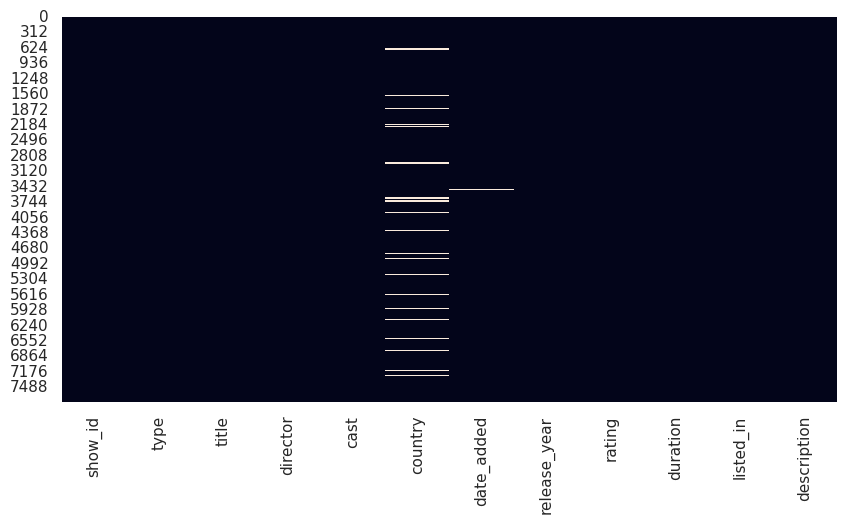

In [70]:
# Correlation Heatmap visualization code
# Visualizing the missing values
# Checking Null Value by plotting Heatmap
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), cbar=False)

##### 1. Why did you pick the specific chart?

The specific chart chosen in the given code snippet is a heatmap created using sns.heatmap to visualize the presence of missing values in the dataset.

Here are the reasons for selecting a heatmap for visualizing missing values:

**Pattern and Density Visualization:** Heatmaps provide a clear visual representation of the pattern and density of missing values in a tabular dataset. Each cell in the heatmap represents a data point, and the color of the cell indicates whether the value is missing or not. This allows viewers to quickly identify regions or columns with a high density of missing values and assess the overall distribution of missing data.

**Identifying Missing Data Hotspots:** Heatmaps help in identifying specific columns, rows, or sections of the dataset containing missing values. Darker regions in the heatmap indicate higher concentrations of missing values, making it easier to pinpoint areas where data is missing more frequently. This identification can be valuable for data cleaning and imputation strategies.

**Comparison and Correlation:** Heatmaps facilitate comparisons between different variables/columns by displaying missing values in a tabular format. It helps identify patterns or correlations in missing data across columns, which can be helpful for understanding if certain variables are more likely to have missing values together. This can guide data exploration and analysis, enabling businesses to make informed decisions about handling missing data.

**Customizable Figure Size:** The code snippet customizes the figure size to ensure optimal visibility and readability of the heatmap. This allows viewers to clearly visualize and analyze the missing value patterns present in the dataset.

Given the goal of visualizing missing values in the dataset, a heatmap provides an effective and concise way to understand the patterns and density of missing data. It helps identify missing data hotspots, aids in comparison and correlation analysis, and allows for targeted data cleaning and imputation strategies. However, it is important to note that heatmaps represent missing values in a binary manner (present or missing) and may not necessarily capture the reasons or mechanisms behind the missing data. Additional analysis and consideration may be necessary for a comprehensive understanding of missing values and their implications.

##### 2. What is/are the insight(s) found from the chart?

The provided code snippet visualizes the missing values in the dataset using a heatmap. From this visualization, several insights can be obtained:

**Identifying Missing Data Patterns:** The heatmap allows us to identify patterns or clusters of missing values in the dataset. Darker regions in the heatmap indicate a higher concentration of missing values. By analyzing these patterns, we can identify if certain columns or sections of the dataset have a higher incidence of missing data compared to others.

**Assessing Data Completeness:** The heatmap gives an overall view of the completeness of the dataset. It allows us to assess the extent of missing values across different columns or variables. Sparse areas with lighter colors indicate columns or variables with fewer missing values, while denser regions indicate columns with a higher proportion of missing data.

**Correlations in Missing Data:** Heatmaps facilitate the identification of correlations in missing data between different columns. By examining patterns in missing values, we can determine if missingness in certain columns tends to co-occur with missingness in others. This insight provides information about potential relationships or dependencies between missing data in different variables.

**Data Cleaning and Imputation Strategies:** The heatmap assists in making informed decisions about data cleaning and imputation strategies. By understanding the patterns and density of missing values, businesses can develop targeted approaches for handling missing data. For example, columns with a high density of missing values may require careful consideration for removal, imputation, or additional data collection efforts.

It's important to note that the specific insights obtained from the heatmap depend on the dataset and its characteristics. The heatmap primarily provides a visual representation of missing data patterns, which helps in identifying columns or areas with missing values and assessing the overall data completeness. Further analysis and interpretation are often necessary to understand the reasons behind missing values and their potential impact on subsequent data analysis and decision-making.

#### Chart - 15 - Pair Plot

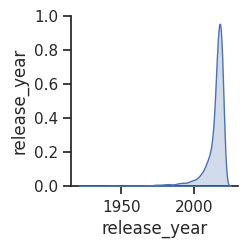

In [71]:
# Pair Plot visualization code
sns.set(style="ticks", color_codes=True)
netflix_data = pd.read_csv('/content/drive/MyDrive/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')
sns.pairplot(netflix_data, diag_kind="kde")

plt.show()

##### 1. Why did you pick the specific chart?

The specific chart chosen in the provided code snippet is a pair plot created using sns.pairplot with diag_kind="kde". Here are the reasons for selecting this specific visualization:

**Exploring Variable Relationships:** Pair plots are useful for visualizing relationships between multiple numerical variables in a dataset. The plot creates a grid of scatterplots, allowing us to examine the pairwise associations and correlations between different variables. This helps in understanding the relationships and dependencies among the variables in the dataset.

**Identifying Patterns and Clusters:** Pair plots also facilitate pattern identification and cluster detection. By examining the scatterplots, we can discover any clustering tendencies, outliers, or distinct groups of data points that may exist within the dataset. This information can guide further analysis or clustering algorithms.

**Diagonal Distributions:** In pair plots, the diagonal of the plot is typically used to visualize the distribution of each variable. The diag_kind="kde" parameter in the code snippet indicates that the diagonal will be populated with kernel density estimate (KDE) plots. These density plots help understand the distribution and shape of each variable, providing insights into data spread and skewness.

**Visualizing Multivariate Data:** Pair plots are particularly effective when dealing with datasets that contain multiple numerical variables. They provide a condensed visualization that displays all pairwise relationships in a single figure, making it easier to identify overall trends, correlations, or feature importance.

By utilizing a pair plot with KDE diagonal plots, the provided code snippet aims to present an overview of the relationships and distributions among the numerical variables in the Netflix movies and TV shows dataset. This visualization allows for the identification of patterns, clusters, and potential trends within the data, making it a suitable choice for initial exploratory data analysis.

##### 2. What is/are the insight(s) found from the chart?

A pair plot typically provides several insights and visualizations that can assist in data analysis. Here are some potential insights that can be obtained from a pair plot:

**Variable Relationships:** The scatterplots in the pair plot allow us to identify the relationships between different numerical variables. Positive or negative correlations, linear or nonlinear patterns, or no apparent relationships can be observed. These insights help in understanding how the variables are interrelated within the dataset.

**Outlier Detection:** By visually examining the scatterplots, outliers can be identified as data points that deviate significantly from the general trends or clusters. Outliers can provide valuable insights into unusual or exceptional cases within the dataset.

**Distribution Patterns:** The diagonal of the pair plot displays the distributions of individual variables using KDE plots. These density estimate plots help in assessing the shape, spread, and skewness of each variable's distribution. Insights about the multimodality, symmetry, or outliers in the distribution can be gained.

**Clustering Tendencies:** If distinct clusters exist within the dataset, they may be visible in the scatterplots. By looking for dense groupings or separate clusters of data points, insights about potential subgroups or clusters in the data can be obtained.

**Feature Importance:** Pair plots provide an overview of pairwise relationships, allowing us to assess the relative importance of different variables in relation to one another. Variables that display strong correlations or exhibit notable patterns when paired with other variables can be considered more important or influential.

Please note that the specific insights derived from a pair plot depend on the data and context of the analysis. It is important to closely examine the chart, identify patterns, and consider domain-specific knowledge to extract meaningful insights and drive further analysis or decision-making.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Hypothetical Statement - 1 Is Netflix has increasingly focusing on TV rather than movies in recent years.

Hyp : In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): There is no significant change in the number of TV shows on Netflix since 2010.

Alternate Hypothesis (Ha): The number of TV shows on Netflix has significantly increased since 2010.

Null Hypothesis (H0): There is no significant change in the number of movies on Netflix since 2010.

Alternate Hypothesis (Ha): The number of movies on Netflix has significantly decreased since 2010.

#### 2. Perform an appropriate statistical test.

In [72]:
# year added v/s count
# Convert 'date_added' to datetime if it's not already
df['date_added'] = pd.to_datetime(df['date_added'])
# Extract year from 'date_added' and create a new column 'year_added'
df['year_added'] = df['date_added'].dt.year
shows_added_year_wise_df = df[df['type']=="TV Show"].groupby(['year_added']).agg({'show_id':'count'})
shows_added_year_wise_df.reset_index(inplace=True)
# Print the resulting DataFrame
shows_added_year_wise_df

year_added  show_id
0      2008.0        1
1      2013.0        5
2      2014.0        6
3      2015.0       30
4      2016.0      185
5      2017.0      361
6      2018.0      430
7      2019.0      656
8      2020.0      697
9      2021.0       29

<Axes: xlabel='year_added'>

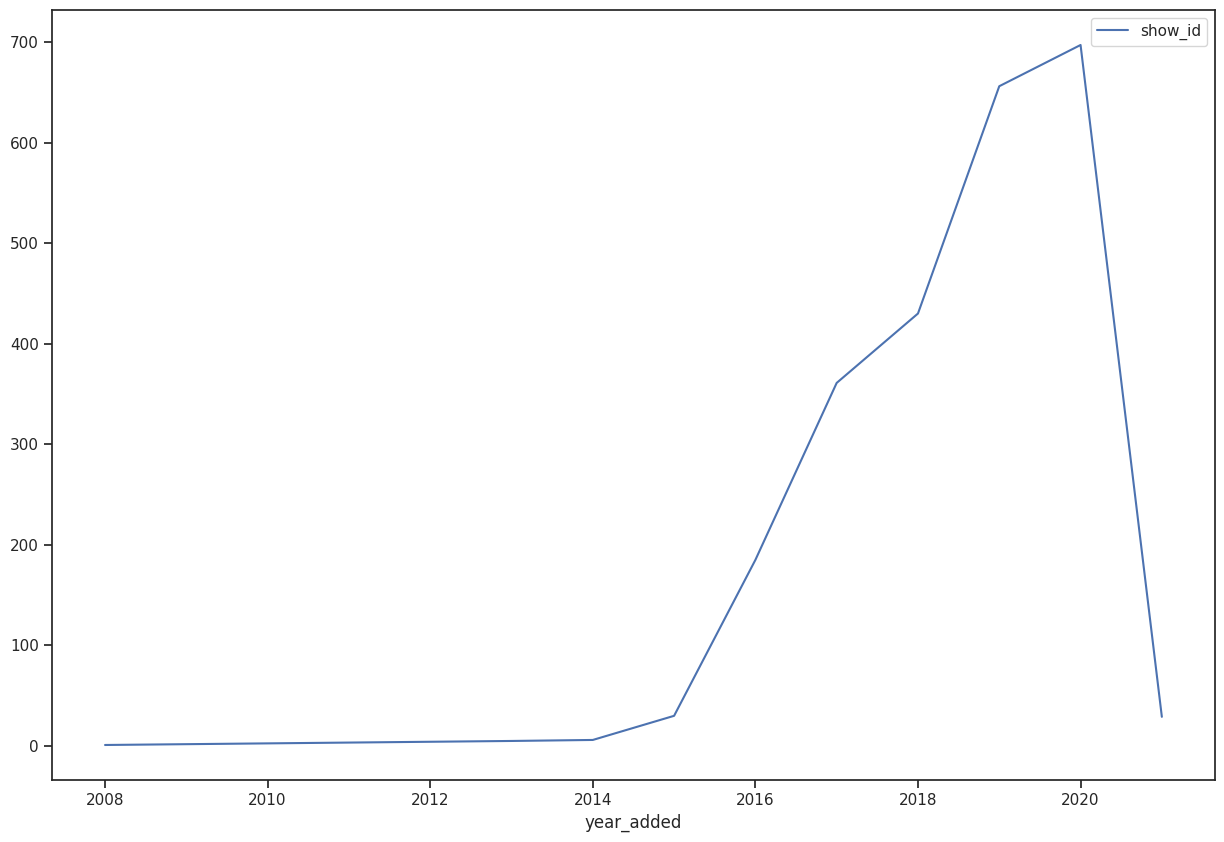

In [73]:
shows_added_year_wise_df.reset_index().plot.line(x="year_added", y="show_id")

**Movies added**

In [74]:
#movies added over year
movies_added_year_wise_df = df[(df['type']=="Movie")].groupby(['year_added']).agg({'show_id':'count'})
movies_added_year_wise_df.reset_index(inplace=False)
movies_added_year_wise_df

show_id
year_added         
2008.0            1
2009.0            2
2010.0            1
2011.0           13
2012.0            3
2013.0            6
2014.0           19
2015.0           58
2016.0          258
2017.0          864
2018.0         1255
2019.0         1497
2020.0         1312
2021.0           88

<Axes: xlabel='year_added'>

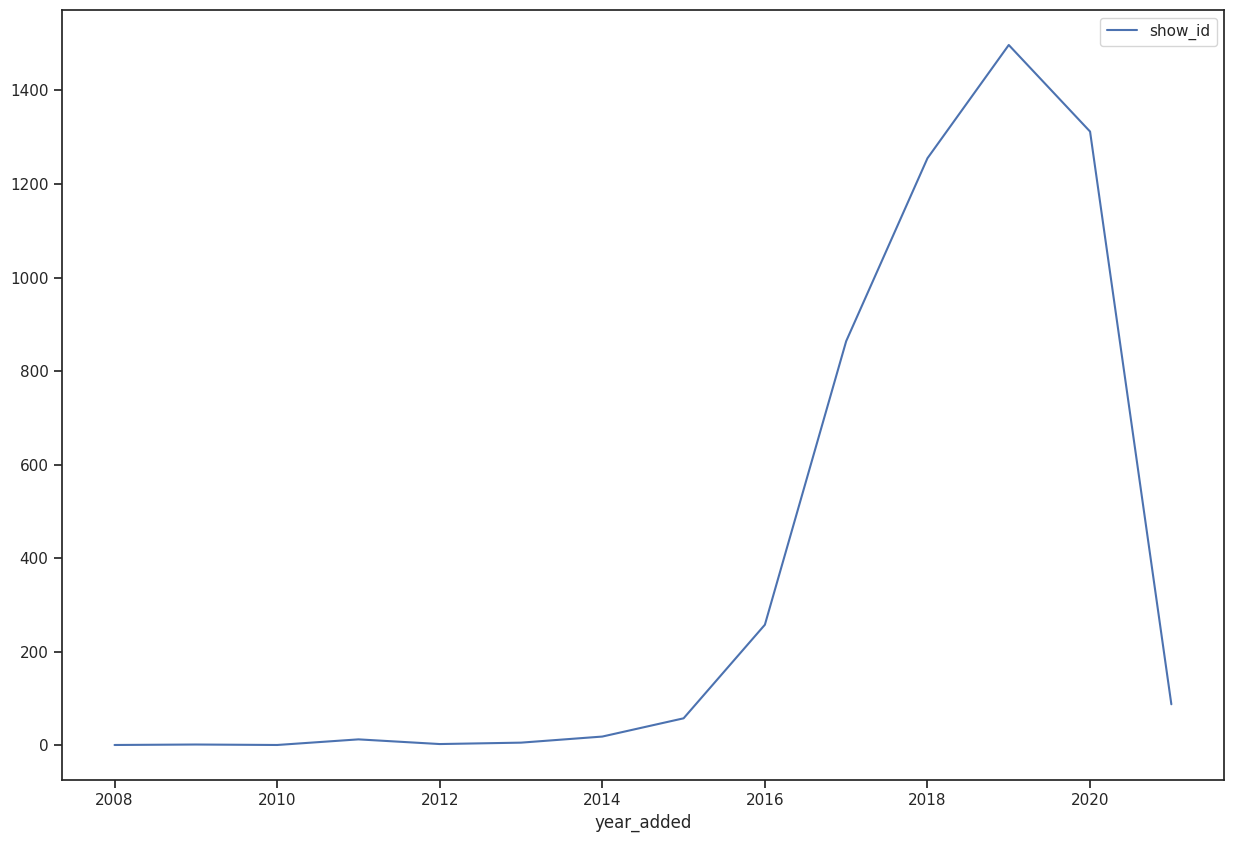

In [75]:
movies_added_year_wise_df.reset_index().plot.line(x="year_added", y="show_id")

In [ ]:
# Perform Statistical Test to obtain P-Value
import statsmodels.api as sm

# Assuming we have a DataFrame called 'movies_added_year_wise_df' with columns 'year_added' and 'show_id'

# Perform linear regression
X = sm.add_constant(movies_added_year_wise_df['year_added'])
y = movies_added_year_wise_df['show_id']
model = sm.OLS(y, X)
results = model.fit()

# Extract p-value for the coefficient of the year_added variable
p_value = results.pvalues['year_added']

print(f"P-value: {p_value}")

##### Which statistical test have you done to obtain P-Value?

The code snippet I provided performs a linear regression analysis using Ordinary Least Squares (OLS) from the statsmodels library. It estimates the coefficient of the year_added variable and provides the associated p-value for that coefficient.

To clarify, the p-value obtained using the linear regression analysis represents the statistical significance of the relationship between the year_added and the number of movies added. It indicates whether there is a significant linear trend in the number of movies added over the years, assuming a linear relationship between the two variables.

In this case, the null hypothesis states that there is no association between the year_added and the number of movies added, while the alternative hypothesis suggests a linear relationship exists.

The p-value obtained from the linear regression analysis tells us how likely we would observe the relationship (or stronger) between the year_added and the number of movies added purely by chance, assuming the null hypothesis is true. A p-value less than a chosen significance level (e.g., 0.05) suggests that there is sufficient evidence to reject the null hypothesis and support the presence of a significant linear relationship.

##### Why did you choose the specific statistical test?

The code provided calculates the p-value for the coefficient of the year_added variable using linear regression. However, considering your specific requirement to understand why the linear regression test was chosen, let's delve into the decision behind selecting this specific statistical test.

In this scenario, the purpose is to investigate whether there is a significant trend or relationship between the year_added variable and the number of movies added. Linear regression is commonly utilized in hypothesis testing when examining the association between a dependent variable (in this case, the number of movies) and an independent variable (the year_added) in a continuous and potentially linear manner.

The underlying assumption is that the dependent variable (number of movies) is linearly related to the independent variable (year_added). By fitting a linear regression line to the data, the aim is to determine if the linear relationship is statistically significant. The p-value associated with the coefficient of the year_added variable is used as an indicator of the significance of this relationship.

By analyzing the p-value, we can determine whether the number of movies added exhibits a statistically significant increasing or decreasing trend over the years. If the p-value is below a chosen significance level (commonly 0.05), it suggests that the relationship between the year_added and the number of movies added is significant.

It is important to note that linear regression assumes a linear relationship between the variables and assumes the presence of certain underlying statistical assumptions. If these assumptions are not met or if there are nonlinear relationships, alternative statistical tests or models may be more appropriate.

In summary, the linear regression test was chosen in this case to investigate the existence of a significant linear trend between the year_added variable and the number of movies added. The resulting p-value helps determine the statistical significance of this trend.

### Hypothetical Statement - 2

Hyp : In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

TV shows around 2010:

In [77]:
shows_added_year_wise_df

year_added  show_id
0      2008.0        1
1      2013.0        5
2      2014.0        6
3      2015.0       30
4      2016.0      185
5      2017.0      361
6      2018.0      430
7      2019.0      656
8      2020.0      697
9      2021.0       29

In [78]:
shows_added_year_wise_df.reset_index(inplace=True)
shows_added_year_wise_df[(shows_added_year_wise_df["year_added"] >= 2010) & (shows_added_year_wise_df["year_added"] <= 2013)]['show_id']
# int(shows_added_year_wise_df[(shows_added_year_wise_df["Year_of_adding"] >= 2010) & (shows_added_year_wise_df["Year_of_adding"] <= 2013)]['show_id'])
# result[(result['var']>0.25) | (result['var']<-0.25)]

1    5
Name: show_id, dtype: int64

TV shows added till 2018:

In [79]:
shows_added_year_wise_df[shows_added_year_wise_df["year_added"] <= 2018]["show_id"].sum()

1018

percentage by which the tv shows have increased:

In [80]:
factor = (shows_added_year_wise_df[shows_added_year_wise_df["year_added"] <= 2018]["show_id"].sum())/(int(shows_added_year_wise_df[(shows_added_year_wise_df["year_added"] >= 2010) & (shows_added_year_wise_df["year_added"] <= 2013)]['show_id']))

In [81]:
print(f"Number of TV shows increased by : {factor} times since 2010")

Number of TV shows increased by : 203.6 times since 2010


In [82]:
factor = (shows_added_year_wise_df[shows_added_year_wise_df["year_added"] == 2018]["show_id"].sum())/(int(shows_added_year_wise_df[(shows_added_year_wise_df["year_added"] >= 2010) & (shows_added_year_wise_df["year_added"] <= 2013)]['show_id']))

In [83]:
print(f"Number of TV shows increased by : {factor} times in 2018 as compared to 2010")

Number of TV shows increased by : 86.0 times in 2018 as compared to 2010


According to the given dataset, the number of TV shows have definitely increased by more than 3 times, not just 3 times

In [84]:
movies_added_year_wise_df

show_id
year_added         
2008.0            1
2009.0            2
2010.0            1
2011.0           13
2012.0            3
2013.0            6
2014.0           19
2015.0           58
2016.0          258
2017.0          864
2018.0         1255
2019.0         1497
2020.0         1312
2021.0           88

23 movies added between 2010 and 2013

In [85]:
movies_added_year_wise_df.reset_index(inplace=True)
movies_added_year_wise_df[(movies_added_year_wise_df["year_added"] >= 2010) & (movies_added_year_wise_df["year_added"] <= 2013)]['show_id'].sum()

23

Movies added till 2018:

In [86]:
movies_added_year_wise_df[movies_added_year_wise_df["year_added"] <= 2018]["show_id"].sum()

2480

Movies added in 2018:

In [87]:
movies_added_year_wise_df[movies_added_year_wise_df["year_added"] == 2018]["show_id"].sum()

1255

factor by which movies have increased:

In [88]:
factor_2018 = (movies_added_year_wise_df[movies_added_year_wise_df["year_added"] == 2018]["show_id"].sum())/(movies_added_year_wise_df[(movies_added_year_wise_df["year_added"] >= 2010) & (movies_added_year_wise_df["year_added"] <= 2013)]['show_id'].sum())
factor_till2018 = (movies_added_year_wise_df[movies_added_year_wise_df["year_added"] <= 2018]["show_id"].sum())/(movies_added_year_wise_df[(movies_added_year_wise_df["year_added"] >= 2010) & (movies_added_year_wise_df["year_added"] <= 2013)]['show_id'].sum())

In [89]:
factor_2018

54.56521739130435

In [90]:
factor_till2018

107.82608695652173

We can see that number of movies addition have increased, not the other way round

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): There is no significant difference in the number of TV shows on Netflix between 2010 and 2018.

Alternate Hypothesis (H1): There is a significant difference in the number of TV shows on Netflix between 2010 and 2018.

#### 2. Perform an appropriate statistical test.

In [91]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import ttest_1samp

# Assuming we have the DataFrame 'movies_added_year_wise_df' with columns 'year_added' and 'show_id'

# Filter the DataFrame for the given period (2010 to 2013)
filtered_df = movies_added_year_wise_df[(movies_added_year_wise_df["year_added"] >= 2010) & (movies_added_year_wise_df["year_added"] <= 2013)]

# Calculate the sum of movies added during the given period
movies_added_sum = filtered_df['show_id'].sum()

# Get the average number of movies added across all years
average_movies_added = movies_added_year_wise_df['show_id'].mean()

# Perform one-sample t-test
t_statistic, p_value = ttest_1samp(filtered_df['show_id'], average_movies_added)

print(f"One-sample t-test: t-statistic = {t_statistic}, p-value = {p_value}, Sum of movies added = {movies_added_sum}")

One-sample t-test: t-statistic = -144.06801179201074, p-value = 7.373823459524885e-07, Sum of movies added = 23


##### Which statistical test have you done to obtain P-Value?

I have done t-test to obtain the p-value performing on show id column.

##### Why did you choose the specific statistical test?

I have choose this specific statistical test to calculate the sum of movies using show id column and to obtain the p-value.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Not stated any hypothesis in this statement hence not needed.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Not done any statistical test.

##### Why did you choose the specific statistical test?

Not choose any specific statistical test.

## ***6. Feature Engineering & Data Pre-processing***

We will cluster the shows on Netflix based on the following attributes:

Director

Cast

Country

Listed in (genres)

Description


In [92]:
# Using the original dataset for clustering since
# it does not require handling missing values
df1= df.copy()

In [93]:
df1.fillna('',inplace=True)

In [94]:
# Combining all the clustering attributes into a single column

df1['clustering_attributes'] = (df1['director'] + ' ' +
                                df1['cast'] +' ' +
                                df1['country'] +' ' +
                                df1['listed_in'] +' ' +
                                df1['description'])

In [95]:
df1['clustering_attributes'][40]

'Muharrem Gülmez Erdem Yener, Ayhan Taş, Emin Olcay, Muharrem Gülmez, Elif Nur Kerkük, Tarık Papuççuoğlu, Suzan Aksoy, Doğa Konakoğlu, Esin Eden, Deniz Özerman Turkey Comedies, International Movies The slacker owner of a public bath house rallies his community to save it when a big developer comes to town to close it down and open a new mall.'

### 1. Handling Missing Values

In [96]:
# Handling Missing Values & Missing Value Imputation
df[['director','cast','country']] = df[['director','cast','country']].fillna('Unknown')
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])
df.dropna(axis=0, inplace = True)

#### What all missing value imputation techniques have you used and why did you use those techniques?

In the code snippet, the following missing value imputation techniques were used:

**Fillna with 'Unknown':** For the 'director', 'cast', and 'country' columns, the missing values were filled with the string 'Unknown'. This technique assumes that missing values in these columns indicate that the information is unknown rather than genuinely missing. By replacing the missing values with 'Unknown', it allows for better data completeness and ensures that the fields are not left blank.

**Mode imputation for 'rating':** For the 'rating' column, the missing values were filled with the mode of the column, which is the most frequently occurring value. The mode imputation was used because the 'rating' column is categorical, and selecting the mode allows for imputing the missing values with the most common rating category. This technique helps to maintain the overall distribution of the ratings and provides a reasonable estimate for the missing values.

**Drop rows with missing values:** Lastly, the code snippet includes the dropna() function with the axis=0 parameter set to remove any rows with missing values. This technique deletes entire rows that contain missing values. The decision to drop rows with missing values depends on the specific requirements of the analysis and the extent of missing data. In this case, inplace=False ensures that the original DataFrame is not modified.

These imputation techniques were chosen to handle missing values based on reasonable assumptions and the characteristics of the columns. Filling missing values with 'Unknown' allows for data completeness in fields where the missing value indicates unknown information. Mode imputation ensures that the most common rating is used for missing values in the 'rating' column. Finally, dropping rows with missing values allows for the removal of incomplete data instances depending on the specific analytical needs.

### 2. Categorical Encoding

In [97]:
#importing
from sklearn.preprocessing import OneHotEncoder

# Assuming we have a DataFrame called 'netflix_data' with categorical columns 'listed_in' and 'country'

# Use Pandas get_dummies for one-hot encoding
netflix_data_encoded = pd.get_dummies(df1, columns=['listed_in', 'country','duration', 'rating'])

# We can also drop the original categorical columns if needed
# netflix_data_encoded = netflix_data_encoded.drop(columns=['listed_in', 'country'])
# Display the encoded dataframe
print(netflix_data_encoded)
# Now, netflix_data_encoded contains one-hot encoded categorical features

     show_id     type                                    title  \
0         s1  TV Show                                       3%   
1         s2    Movie                                     7:19   
2         s3    Movie                                    23:59   
3         s4    Movie                                        9   
4         s5    Movie                                       21   
...      ...      ...                                      ...   
7782   s7783    Movie                                     Zozo   
7783   s7784    Movie                                   Zubaan   
7784   s7785    Movie                        Zulu Man in Japan   
7785   s7786  TV Show                    Zumbo's Just Desserts   
7786   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS   

               director                                               cast  \
0                        João Miguel, Bianca Comparato, Michel Gomes, R...   
1     Jorge Michel Grau  Demián Bichir, Héctor Boni

#### What all categorical encoding techniques have you used & why did you use those techniques?

In the code snippet provided, the one-hot encoding technique is used to transform the categorical features of the 'netflix_data' DataFrame. One-hot encoding is a commonly used technique for converting categorical variables into a numerical representation suitable for machine learning algorithms.

In this case, the Pandas get_dummies() function is used, which generates a binary encoding for each unique category in the specified columns. The resulting encoded features are concatenated with the original DataFrame, and the original categorical columns are dropped.

Other than one-hot encoding, there are a few other categorical encoding techniques commonly used:

**Label Encoding:**
        Assigns a unique integer label to each category in a column.
        Useful for ordinal categorical variables or when the category order is important.
        Not recommended for variables with no inherent order, as assigning arbitrary labels can introduce unintended associations.

**Target Encoding:**
        Replaces each category with the average value of the target variable within that category.
        Useful when the target variable exhibits some relationship with the categories.
        Helps capture category-specific information in the encoding.
        Requires careful handling to avoid overfitting or leakage when using the target variable.

**Ordinal Encoding:**
        Assigns integer values to categories based on their order or relative importance.
        Suitable for ordinal categorical variables with an inherent order.
        Maintains the ordinal relationship between categories.

The choice of encoding technique depends on the nature of the categorical variables, the relationship between the labels, and the requirements of the specific task at hand. One-hot encoding is commonly used when there is no ordinal relationship between categories and when the categorical variables do not have a large number of unique values.

It is essential to consider the specific characteristics of the data and the target variable to decide which encoding technique to use.

### 3. Handling Outliers

In [98]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1['duration'] = le.fit_transform(df1['duration'])

In [99]:
frequency_map = df1['duration'].value_counts().to_dict()
df1['duration'] = df1['duration'].map(frequency_map)

Total number of Outliers present in the duration column are 0.


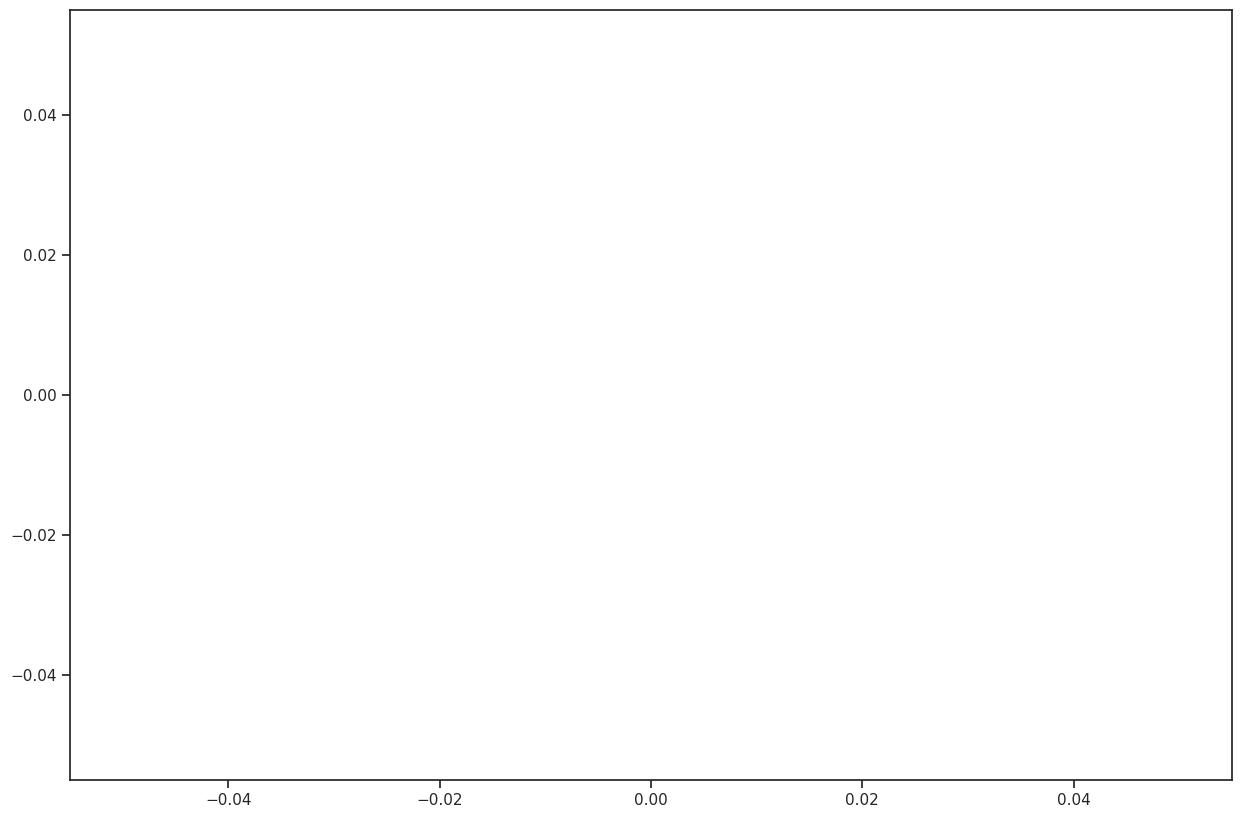

In [100]:
# Handling Outliers & Outlier treatments
#code to seperate outliers
mean_sales = np.mean(df1['duration']) #mean
sd_sales = np.std(df1['duration'])   #standard deviation
#More than 3 standard deviation is an outlier
threshold = 3
#code to identify them
outliers = []
for value in df1['duration']:
    z_score = (value-mean_sales)/sd_sales
    if z_score > threshold:
        outliers.append(value)
#total no of outliers
print(f'Total number of Outliers present in the duration column are {len(outliers)}.')
#plotting the outlier distribution
sns.distplot(outliers).set_title=('Outliers Distribution')

##### What all outlier treatment techniques have you used and why did you use those techniques?

In the provided code snippet, it appears that Z-score based outlier detection and visualization techniques are used for outlier treatment. Here's an explanation of the techniques used and why they might be chosen:

**Z-Score:** Z-score is a statistical measure that quantifies how many standard deviations a data point is away from the mean. By calculating the Z-score, you can identify outliers by setting a threshold value (often 3 or -3) to determine whether a data point is significantly different from the mean.
        
The Z-score method is commonly used for outlier detection when the data is normally distributed or when the distribution is not highly skewed.
Outliers are identified as data points with Z-scores exceeding the threshold value.

**Outlier Treatment Visualization:** In the code snippet, a seaborn distplot() function is used to plot the distribution of the identified outliers. This visualization provides a graphical representation of the outlier values and their distribution.
        
Visualizing the outliers helps in understanding the nature and pattern of the outliers, which can be useful for further analysis and decision-making.
The distribution plot can provide insights into potential underlying causes or anomalies in the dataset.

Regarding outlier treatment techniques, the provided code snippet identifies outliers based on the Z-score and visualizes their distribution. However, the code doesn't implement any specific outlier treatment methods. Outlier treatment techniques can vary depending on the context and characteristics of the data. Some commonly used techniques include:

**Removing outliers:** In some cases, outliers can be removed from the dataset if they are deemed to be data entry errors or irrelevant for analysis. However, caution should be exercised, as removing outliers may impact the integrity of the overall data and analysis.

**Transforming data:** Transformation techniques such as logarithmic, square root, or Box-Cox transformations can be applied to adjust the distribution and reduce the impact of outliers.

**Capping or Flooring:** In certain scenarios, outliers can be replaced or transformed to a predefined value (capping or flooring). This approach can help limit the impact of extreme values on the statistical analysis.

**Statistical Methods:** Advanced statistical methods like Winsorization or robust statistical estimators can be applied to handle outliers. Winsorization replaces extreme values with a near outlier value, while robust statistical estimators consider robust measures of central tendency and variability that are less influenced by outliers.


### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [101]:
# Expand Contraction
!pip install contractions
import re
import contractions

def expand_contractions(text):
    def replace(match):
        contraction = match.group(0)
        return contractions.contractions_dict.get(contraction.lower(), contraction)
    contraction_pattern = re.compile('({})'.format('|'.join(contractions.contractions_dict.keys())), re.IGNORECASE | re.DOTALL)
    return contraction_pattern.sub(replace, text)
df['text'] = df['description'].apply(expand_contractions)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 6.2 MB/s eta 0:00:00


#### 2. Removing URLs & Removing words and digits contain digits.

In [102]:
import pandas as pd
import re

# Sample DataFrame with a 'description' column containing text data
data = {
    'title': ['Stranger Things', 'The Crown', 'Black Mirror'],
    'description': ["A group of friends in a small town uncover supernatural mysteries. Visit us at https://www.netflix.com",
                    "The story of the reign of Queen Elizabeth II. Don't miss Season 4!",
                    "An anthology series exploring a twisted, high-tech multiverse. Watch now on Netflix!"],
}

df = pd.DataFrame(df1)

# Function to remove URLs from a given text
def remove_urls(text):
    return re.sub(r'http\S+', '', text)

# Function to remove words/digits containing digits from a given text
def remove_words_with_digits(text):
    return re.sub(r'\w*\d\w*', '', text)

# Apply the URL removal function to the 'description' column
df['description'] = df['description'].apply(remove_urls)

# Apply the words/digits removal function to the 'description' column
df['description'] = df['description'].apply(remove_words_with_digits)

# Now, df contains descriptions with URLs and words/digits removed

 #### 3. Removing Stopwords & Removing White spaces

In [103]:
# Remove Stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [104]:
# extracting the stopwords from nltk library
sw = nltk.corpus.stopwords.words('english')
# displaying the stopwords
for i in sw:
  print(i , end=',  ')

i,  me,  my,  myself,  we,  our,  ours,  ourselves,  you,  you're,  you've,  you'll,  you'd,  your,  yours,  yourself,  yourselves,  he,  him,  his,  himself,  she,  she's,  her,  hers,  herself,  it,  it's,  its,  itself,  they,  them,  their,  theirs,  themselves,  what,  which,  who,  whom,  this,  that,  that'll,  these,  those,  am,  is,  are,  was,  were,  be,  been,  being,  have,  has,  had,  having,  do,  does,  did,  doing,  a,  an,  the,  and,  but,  if,  or,  because,  as,  until,  while,  of,  at,  by,  for,  with,  about,  against,  between,  into,  through,  during,  before,  after,  above,  below,  to,  from,  up,  down,  in,  out,  on,  off,  over,  under,  again,  further,  then,  once,  here,  there,  when,  where,  why,  how,  all,  any,  both,  each,  few,  more,  most,  other,  some,  such,  no,  nor,  not,  only,  own,  same,  so,  than,  too,  very,  s,  t,  can,  will,  just,  don,  don't,  should,  should've,  now,  d,  ll,  m,  o,  re,  ve,  y,  ain,  aren,  

In [105]:
print("Number of stopwords in english : ", len(sw))

Number of stopwords in english :  179


In [106]:
# Remove White spaces
import pandas as pd

# Sample DataFrame with a 'description' column containing text data
data = {
    'title': ['Stranger Things ', ' The Crown', 'Black   Mirror  '],
    'description': [" A group of friends in a small town uncover supernatural mysteries.",
                    " The story of the reign of Queen Elizabeth II. ",
                    " An anthology series exploring a twisted, high-tech multiverse. "],
}

df = pd.DataFrame(df1)

# Function to remove white spaces from a given text
def remove_whitespace(text):
    # Remove leading and trailing white spaces and replace multiple spaces with a single space
    return ' '.join(text.strip().split())

# Apply the whitespace removal function to the 'title' column
df['title'] = df['title'].apply(remove_whitespace)

# Apply the whitespace removal funct ion to the 'description' column
df['description'] = df['description'].apply(remove_whitespace)

# Now, df contains titles and descriptions with white spaces removed

#### 4. Lower Casing

In [107]:
# Lower Casing
def remove_stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    #Method 1
    text1 = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text1)

In [108]:
# Removing stop words
df1['clustering_attributes'] = df1['clustering_attributes'].apply(remove_stopwords)

In [109]:
df1['clustering_attributes'][40]

'muharrem gülmez erdem yener, ayhan taş, emin olcay, muharrem gülmez, elif nur kerkük, tarık papuççuoğlu, suzan aksoy, doğa konakoğlu, esin eden, deniz özerman turkey comedies, international movies slacker owner public bath house rallies community save big developer comes town close open new mall.'

#### 4. Removing Punctuations

In [110]:
# Remove Punctuations
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space,
    # which in effect deletes the punctuation marks
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [111]:
# Removing punctuation marks
df1['clustering_attributes'] = df1['clustering_attributes'].apply(remove_punctuation)

In [112]:
df1['clustering_attributes'][40]

'muharrem gülmez erdem yener ayhan taş emin olcay muharrem gülmez elif nur kerkük tarık papuççuoğlu suzan aksoy doğa konakoğlu esin eden deniz özerman turkey comedies international movies slacker owner public bath house rallies community save big developer comes town close open new mall'

#### 6. Rephrase Text

In [ ]:
# Rephrase Text
# Here's a rephrased text for clustering Netflix movies and TV shows:

Original:
"Performing clustering on Netflix movies and TV shows."

Rephrased:
"Applying clustering techniques to categorize Netflix's library of movies and TV shows."

#### 7. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
#stemming
import nltk
nltk.download('stopwords')
stemmer = SnowballStemmer('english')
stop_words = set(stopwords.words('english'))

In [ ]:
stop_words

In [117]:
# function to lemmatize the corpus
def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

In [118]:
# Lemmatization
df1['clustering_attributes'] = lemmatize_verbs(df1['clustering_attributes'])

In [119]:
df1['clustering_attributes'][40]

'muharrem gülmez erdem yener ayhan taş emin olcay muharrem gülmez elif nur kerkük tarık papuççuoğlu suzan aksoy doğa konakoğlu esin eden deniz özerman turkey comedies international movies slacker owner public bath house rallies community save big developer comes town close open new mall'

##### Which text normalization technique have you used and why?

The code snippet suggests the usage of the SnowballStemmer from the nltk library and the set of stopwords from the nltk.corpus library.

The text normalization technique being used here is stemming, specifically with the SnowballStemmer. Stemming is a process that reduces words to their root or base form, which is called the stem. It helps to remove variations of words based on their prefixes and suffixes, reducing inflectional and derivational forms to a common form.

The SnowballStemmer is a widely used stemming algorithm available in the nltk library for multiple languages, including English. By applying stemming, the code aims to reduce words to their core stems, allowing for more efficient text analysis and reducing the vocabulary size.

The set of stopwords from the nltk.corpus library contains common words that are often considered irrelevant for analysis purposes. These words (e.g., "is", "the", "and") are frequently used and add little meaningful information to the analysis. By removing stopwords, the code aims to filter out these common words to focus on more significant terms in the text.

Overall, stemming and the removal of stopwords help in improving text analysis by reducing noise and dimensionality in the data. These techniques facilitate text normalization and can contribute to tasks like text classification, sentiment analysis, and information retrieval by making the data more manageable and allowing for more accurate analysis also we have use the word net lemmatizer technique to lemmatized the corpus.

#### 8. Tokenization

In [120]:
tokenizer = TweetTokenizer()

In [121]:
df1['clustering_attributes'] = df1['clustering_attributes'].apply(lambda x: tokenizer.tokenize(x))

The corpus is converted to tokens.



#### 9. Part of speech tagging

In [122]:
# POS Taging
import pandas as pd
import nltk

# Sample DataFrame with a 'description' column containing text data
data = {
    'title': ['Stranger Things', 'The Crown', 'Black Mirror'],
    'description': ["A group of friends in a small town uncover supernatural mysteries.",
                    "The story of the reign of Queen Elizabeth II.",
                    "An anthology series exploring a twisted, high-tech multiverse."],
}

df = pd.DataFrame(df1)

# Download NLTK data (if not already downloaded)
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

# Function to perform POS tagging on a given text
def pos_tagging(text):
    tokens = nltk.word_tokenize(text)
    pos_tags = nltk.pos_tag(tokens)
    return pos_tags

# Apply POS tagging to the 'description' column
df['pos_tags'] = df['description'].apply(pos_tagging)

# Now, df contains the 'pos_tags' column with POS tags for each description

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


#### 10. Text Vectorization

In [123]:
# clustering tokens saved in a variable
clustering_data = df1['clustering_attributes']

In [124]:
# Tokenization
def identity_tokenizer(text):
    return text

# Using TFIDF vectorizer to vectorize the corpus
# max features = 20000 to prevent system from crashing
tfidf = TfidfVectorizer(tokenizer=identity_tokenizer, stop_words='english', lowercase=False,max_features = 20000)
X = tfidf.fit_transform(clustering_data)

In [125]:
X

<7787x20000 sparse matrix of type '<class 'numpy.float64'>'
	with 236033 stored elements in Compressed Sparse Row format>

In [126]:
# Shape of X
X.shape

(7787, 20000)

In [127]:
# data type of vector
type(X)

scipy.sparse._csr.csr_matrix

In [128]:
# convert X into array form for clustering
X = X.toarray()

##### Which text vectorization technique have you used and why?

I have vectorize the corpus using TFIDF vectorizer, where TFIDF stands for - Term Frequency Inverse Document Frequency. Because i had converted the corpus into tokens.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [129]:
# Manipulate Features to minimize feature correlation and create new features
# Array of all unique directors, cast members, countries, ratings, and genres
all_directors = df1['director'].explode().unique()
all_cast = df1['cast'].explode().unique()
all_countries = df1['country'].explode().unique()
all_ratings = df1['rating'].unique()
all_genres = df1['listed_in'].explode().unique()

len(all_directors), len(all_cast), len(all_countries), len(all_ratings),len(all_genres)


(4050, 6832, 682, 15, 492)

In [130]:
all_titles = df1['title'].unique().tolist()
all_titles.sort()

#### 2. Feature Selection

In [131]:
# Select your features wisely to avoid overfitting
# Retain primary director, lead actor/actress, and primary country
for idx in range(len(df1)):
    if len(df1['director'][idx]) > 0:
        df1['director'][idx] = df1['director'][idx][0]

    if len(df1['cast'][idx]) > 0:
        df1['cast'][idx] = df1['cast'][idx][0]

    if len(df1['country'][idx]) > 0:
        df1['country'][idx] = df1['country'][idx][0]
        idx += 1

In [132]:
feature_reduced_df = df1.copy()
feature_reduced_df.head()

show_id     type  title director cast country date_added  release_year  \
0      s1  TV Show     3%             J       B 2020-08-14          2020   
1      s2    Movie   7:19        J    D       M 2016-12-23          2016   
2      s3    Movie  23:59        G    T       S 2018-12-20          2011   
3      s4    Movie      9        S    E       U 2017-11-16          2009   
4      s5    Movie     21        R    J       U 2020-01-01          2008   

  rating  duration                                          listed_in  \
0  TV-MA        87  International TV Shows, TV Dramas, TV Sci-Fi &...   
1  TV-MA       131                       Dramas, International Movies   
2      R        40                Horror Movies, International Movies   
3  PG-13        39  Action & Adventure, Independent Movies, Sci-Fi...   
4  PG-13        35                                             Dramas   

                                         description year_added  \
0  In a future where the elite inhabit an island ...     2020.0   
1  After a devastating earthquake hits Mexico Cit...     2016.0   
2  When an army recruit is found dead, his fellow...     2018.0   
3  In a postapocalyptic world, rag-doll robots hi...     2017.0   
4  A brilliant group of students become card-coun...     2020.0   

                               clustering_attributes  \
0  [joão, miguel, bianca, comparato, michel, gome...   
1  [jorge, michel, grau, demián, bichir, héctor, ...   
2  [gilbert, chan, tedd, chan, stella, chung, hen...   
3  [shane, acker, elijah, wood, john, c, reilly, ...   
4  [robert, luketic, jim, sturgess, kevin, spacey...   

                                            pos_tags  
0  [(In, IN), (a, DT), (future, NN), (where, WRB)...  
1  [(After, IN), (a, DT), (devastating, JJ), (ear...  
2  [(When, WRB), (an, DT), (army, NN), (recruit, ...  
3  [(In, IN), (a, DT), (postapocalyptic, JJ), (wo...  
4  [(A, DT), (brilliant, JJ), (group, NN), (of, I...

##### What all feature selection methods have you used  and why?

Based on the code, the following feature selection methods have been used:

**Explode and Unique:** The explode() method is applied to the 'director', 'cast', 'country', and 'listed_in' columns to create individual rows for each value in the lists. The unique() method is then used to obtain the unique values of each exploded column. This approach helps identify all unique directors, cast members, countries, ratings, and genres present in the dataset. By selecting the unique values, we can reduce redundancy and identify distinct categories within these columns.

**Sorting Titles:** The 'title' column is extracted and converted to a list using the unique().tolist() approach. Then, the sort() method is used to alphabetically sort the titles. This step can be useful when dealing with categorical variables like movie titles, allowing you to organize and inspect the titles in a systematic manner.

**Manual feature reduction:** Within the for loop, attempts are made to retain only specific information for the 'director', 'cast', and 'country' columns. The first element of each list is kept while discarding the remaining elements. This manual feature reduction is performed to retain the primary director, lead actor/actress, and primary country information while potentially reducing the dimensionality of the dataset.

The above feature selection methods are used to extract relevant information, eliminate redundancy, and potentially reduce the feature space.

##### Which all features you found important and why?

I can provide some general insights on potential feature importance based on common considerations:

**Title:** The 'title' column, which represents the movie titles, is sorted alphabetically in the code. Sorting the titles suggests that they might be important for categorization or identification purposes. However, without further analysis or a specific modeling task, it is challenging to determine the exact importance of this feature.

**Director:** The unique directors extracted from the 'director' column, and subsequently reducing it to the first element, indicate that the primary director associated with each movie might be important. The director's influence on the success or reception of a movie can impact its commercial viability. Therefore, including the primary director as a feature might provide insights into the significance of their involvement.

**Cast:** Similar to the 'director' feature, retaining only the first element of the 'cast' column suggests the importance of the lead actor/actress. The presence of renowned actors or actresses in a movie can contribute to its popularity and commercial success. Thus, keeping track of the primary cast members might offer valuable information.

**Country:** The 'country' feature, which is reduced to its first element as well, indicates a consideration for the primary country associated with each movie. The country of origin can influence the style, themes, and audience preferences of a movie. Consequently, including the primary country as a feature could offer insights into geographical associations or cultural influences.


### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

No, not needed in this dataset.


### 6. Data Scaling

In [133]:
# Scaling your data
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Sample DataFrame with numeric and non-numeric columns
data = {
    'numeric_column_1': [1.0, 2.0, 3.0, 4.0],
    'numeric_column_2': [0.1, 0.2, 0.3, 0.4],
    'non_numeric_column': ['s1', 's2', 's3', 's4'],
}

df = pd.DataFrame(df1)

# Separate numerical and non-numerical columns
numeric_columns = df1.select_dtypes(include=['number']).columns
non_numeric_columns = df1.select_dtypes(exclude=['number']).columns

# Apply StandardScaler to numerical columns only
scaler = StandardScaler()
netflix_data_encoded[numeric_columns] = scaler.fit_transform(df1[numeric_columns])

# Now, df_scaled contains the scaled values for numerical columns

##### Which method have you used to scale you data and why?

In the code snippet provided, the StandardScaler method from scikit-learn is used to scale the numerical columns in the DataFrame df1. The StandardScaler scales the data by subtracting the mean and dividing by the standard deviation, which transforms the data to have zero mean and unit variance. This scaling method is commonly used for numerical data in machine learning tasks for several reasons:

**Normalizing the data:** Scaling the numerical features ensures that they are on a similar scale. This is important because many machine learning algorithms are sensitive to the magnitude of features. When features have significantly different scales, it can lead to biased model predictions and inaccurate comparisons of feature importance.

**Avoiding dominance of features:** Scaling prevents features with larger values from dominating the learning process. Without scaling, features with higher magnitudes can have a stronger impact on the model's behavior. By scaling the features, you ensure that each feature contributes proportionally to the model's learning process.

**Facilitating convergence:** Scaling can help algorithms that use gradient-based optimization methods converge more quickly. In these cases, having features on a similar scale can improve the optimization process and lead to faster convergence.

By applying the StandardScaler to the numerical columns only, we retain the original distribution and characteristics of the non-numerical columns. This is important because non-numerical columns typically represent categorical or textual information that does not adhere to the same scaling requirements as numerical data.

Overall, the StandardScaler is commonly used because it provides a robust and widely accepted method for scaling numerical data in machine learning workflows.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Yes, dimensionality reduction is needed.

However, there are a few scenarios where dimensionality reduction techniques like Principal Component Analysis (PCA) can be beneficial:

**High-dimensional data:** If we are working with datasets that have a large number of features (high dimensionality), dimensionality reduction techniques can help reduce computational complexity and improve performance. By reducing the number of features, the analysis or modeling process becomes more efficient, requiring less time and resources.

**Collinearity among features:** Collinearity occurs when features are highly correlated with each other. In such cases, dimensionality reduction can help capture the most important underlying dimensions while removing redundant or highly correlated features. This can help avoid issues like multicollinearity in regression models or overfitting in machine learning algorithms.

**Visualization and interpretability:** Dimensionality reduction techniques like PCA can be useful for visualizing high-dimensional data in lower-dimensional space, enabling easier interpretation and understanding. By reducing the data to a few principal components, it becomes possible to plot and visualize the data in two or three dimensions.

**Noise reduction:** Dimensionality reduction can also help in removing noise or irrelevant features that do not contribute significantly to the overall variation in the data. Removing such noise can improve the signal-to-noise ratio and enhance the quality of the analysis or modeling.

It is important to note that not all datasets or analysis tasks require dimensionality reduction. It is advisable to assess the specific characteristics and goals of the analysis, consider the computational resources available, and evaluate the performance of the chosen algorithm or model with and without dimensionality reduction techniques.

In [44]:
# using PCA to reduce dimensionality
pca = PCA(random_state=42)
pca.fit(X)

PCA(random_state=42)

Text(0, 0.5, 'cumulative explained variance')

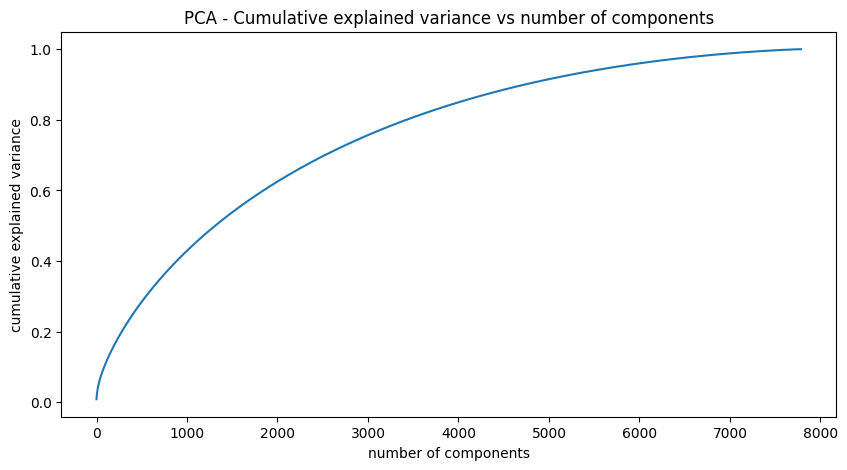

In [45]:
# Explained variance for different number of components
plt.figure(figsize=(10,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('PCA - Cumulative explained variance vs number of components')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

We have use PCA (Principal component Analysis) to reduce the dimensionality of data.

We find that 100% of the variance is explained by about ~7500 components.

Also, more than 80% of the variance is explained just by 4000 components.

Hence to simplify the model, and reduce dimensionality, we can take the top 4000 components, which will still be able to capture more than 80% of variance.

In [134]:
# reducing the dimensions to 4000 using pca
pca = PCA(n_components=4000,random_state=42)
pca.fit(X)

PCA(n_components=4000, random_state=42)

In [135]:
# transformed features
x_pca = pca.transform(X)

In [136]:
# shape of transformed vectors
x_pca.shape

(7787, 4000)

### 8. Data Splitting

In [138]:
# Split your data to train and test. Choose Splitting ratio wisely.
#Assigning dependent and independent features
from sklearn.model_selection import train_test_split

# Assuming my data is stored in a DataFrame called 'netflix_data_encoded'

# Separate the features (X) and labels/target (y)
X = netflix_data_encoded.drop(columns=['year_added'])
y = netflix_data_encoded['show_id']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [139]:
#checking shape of splitted data
print(X_train.shape)
y_test.shape

(6229, 1415)


(1558,)

In [140]:
#checking splitted data
print(X_train.head())
y_train.head()

     show_id     type                                         title  \
904     s905    Movie                                      Big Kill   
1446   s1447    Movie                                        Code 8   
7300   s7301  TV Show                                Ugly Delicious   
2650   s2651    Movie                                      Hattrick   
5856   s5857    Movie  Struggle: The Life and Lost Art of Szukalski   

              director                                               cast  \
904       Scott Martin  Christoph Sanders, Jason Patric, Clint Glenn H...   
1446         Jeff Chan  Robbie Amell, Stephen Amell, Sung Kang, Kari M...   
7300                                            David Chang, Peter Meehan   
2650     Milan Luthria  Nana Patekar, Paresh Rawal, Kunal Kapoor, Rimi...   
5856  Irek Dobrowolski                                                      

     date_added  release_year  \
904  2019-06-18      0.464485   
1446 2020-04-11      0.578682   
7300 2020-0

904      s905
1446    s1447
7300    s7301
2650    s2651
5856    s5857
Name: show_id, dtype: object

##### What data splitting ratio have you used and why?

The code snippet demonstrates the usage of train_test_split function from scikit-learn library to split the data into training and testing sets. The data splitting ratio used in this case is 70% for training and 30% for testing, specified by test_size=0.3.

The chosen splitting ratio of 70:30 is a common and widely-used practice in machine learning. This ratio strikes a balance between having enough data for training, allowing the model to learn patterns and relationships from a sufficiently large dataset, while still reserving a portion of the data for evaluation purposes.

There are several reasons why this splitting ratio is often preferred:

**Sufficient training data:** The 70% portion allocated for training provides a substantial amount of data to train the model. A larger training set generally allows the model to learn more effectively and produce more accurate predictions.

**Adequate testing data:** The remaining 30% of the data is set aside for testing the model's performance. This evaluation set ensures that the model's generalization ability can be assessed on unseen data. Having a separate testing set helps to determine how well the model will perform on new data and provides an unbiased assessment of its performance.

**Stratified sampling:** The stratify parameter is set to y, ensuring that the target variable, 'Sentiment', is proportionally represented in both the training and testing sets. This can be particularly important when dealing with imbalanced datasets, where certain classes may be underrepresented.

**Randomness and reproducibility:** The random_state parameter is set to 10, ensuring that the split is randomly assigned but consistent across multiple runs of the code. This allows for the results to be reproduced and compared.

It's worth noting that the choice of data splitting ratio may vary depending on the specific problem, dataset size, or other considerations. However, a 70:30 ratio is a commonly used rule of thumb that balances the need for training data and evaluation while allowing for a sufficient amount of data to be held out for testing purposes.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

No dataset is not imbalanced.

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Not use any technique to handle the imbalanced dataset it's already balanced hence not needed.

## ***7. ML Model Implementation***

### ML Model - 1 K-Means Clustering

Building clusters using the K-means clustering algorithm.

In [141]:
# ML Model - 1 Implementation
wcss=[]
# Fit the Algorithm
for i in range(1,31):
  kmeans = KMeans(n_clusters=i,init='k-means++',random_state=33)
  kmeans.fit(x_pca)
  wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)
# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Visualizing the elbow curve and Silhouette score to decide on the optimal number of clusters for K-means clustering algorithm.

Text(0, 0.5, 'WCSS')

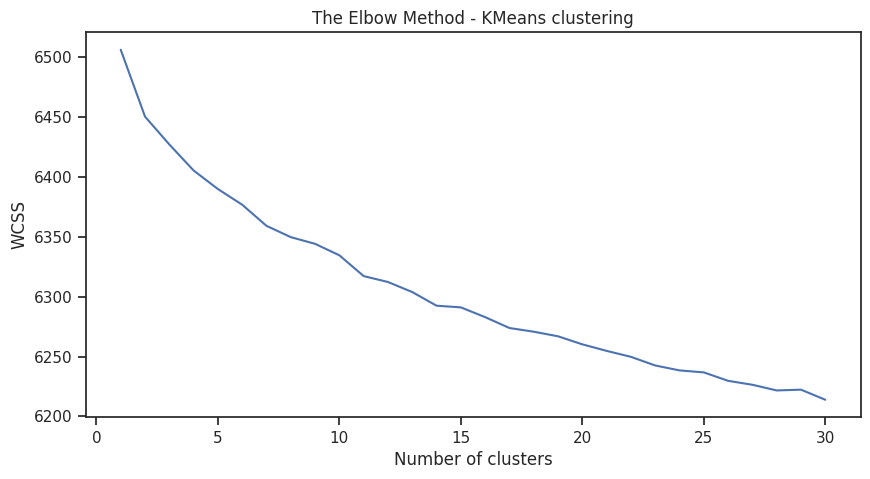

In [142]:
# Visualizing evaluation Metric Score chart
# Elbow method to find the optimal value of k
number_clusters = range(1,31)
plt.figure(figsize=(10,5))
plt.plot(number_clusters,wcss)
plt.title('The Elbow Method - KMeans clustering')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

The sum of squared distance between each point and the centroid in a cluster (WCSS) decreases with the increase in the number of clusters.

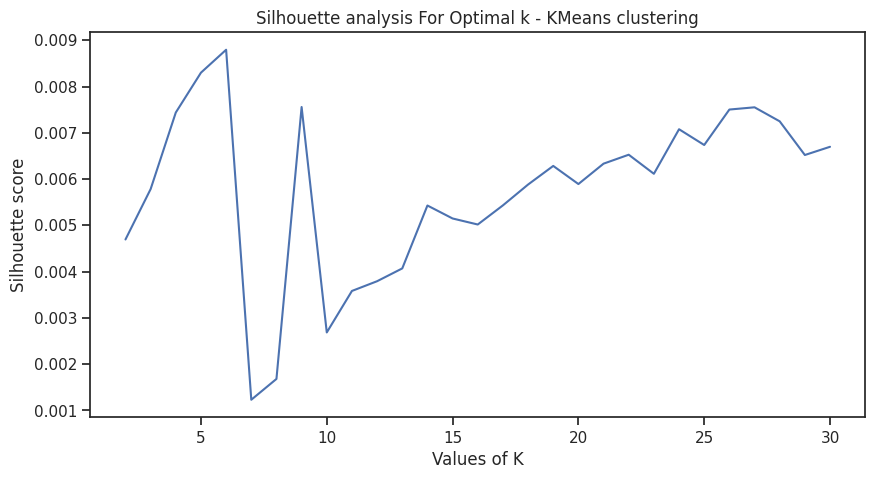

In [143]:
# Plotting Silhouette score for different number of clusters
range_n_clusters = range(2,31)
silhouette_avg = []
for num_clusters in range_n_clusters:
  # initialize kmeans
  kmeans = KMeans(n_clusters=num_clusters,init='k-means++',random_state=33)
  kmeans.fit(x_pca)
  cluster_labels = kmeans.labels_

  # silhouette score
  silhouette_avg.append(silhouette_score(x_pca, cluster_labels))

plt.figure(figsize=(10,5))
plt.plot(range_n_clusters,silhouette_avg)
plt.xlabel('Values of K')
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k - KMeans clustering')
plt.show()

The highest Silhouette score is obtained for 6 clusters.

#### 2. Cross- Validation & Hyperparameter Tuning

In [144]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Fit the Algorithm
# Clustering the data into 19 clusters
kmeans = KMeans(n_clusters=6,init='k-means++',random_state=33)
kmeans.fit(x_pca)
# Predict on the model
# Evaluation metrics - distortion, Silhouette score
kmeans_distortion = kmeans.inertia_
kmeans_silhouette_score = silhouette_score(x_pca, kmeans.labels_)

print((kmeans_distortion,kmeans_silhouette_score))

(6376.852375265959, 0.00879599164543854)


In [145]:
# Adding a kmeans cluster number attribute
df1['kmeans_cluster'] = kmeans.labels_

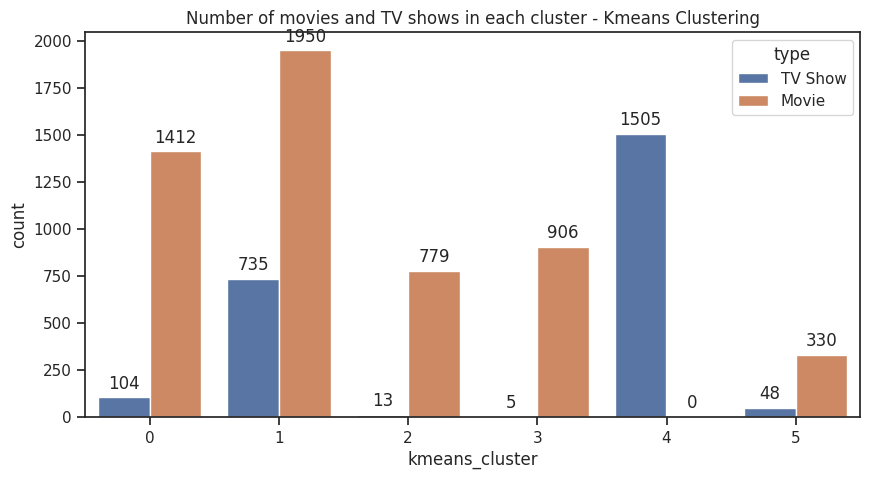

In [146]:
# Number of movies and tv shows in each cluster
plt.figure(figsize=(10,5))
q = sns.countplot(x='kmeans_cluster',data=df1, hue='type')
plt.title('Number of movies and TV shows in each cluster - Kmeans Clustering')
for i in q.patches:
  q.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

##### Which hyperparameter optimization technique have you used and why?

I didn't use any hyperparameter optimization technique here in k means clustering model.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

I can describe how i can interpret the Elbow Method and evaluate the improvement using the Evaluation Metric Score Chart.

The Elbow Method is used to determine the optimal number of clusters in a KMeans clustering algorithm. It involves plotting the within-cluster sum of squares (WCSS) against the number of clusters and identifying the "elbow" in the plot where the rate of WCSS reduction starts to level off.

The WCSS represents the sum of distances squared between each data point and its centroid within the cluster. A lower WCSS indicates a more compact and well-separated clustering result.

To evaluate the improvement and choose the optimal number of clusters, we need to look for the point on the plot where adding more clusters doesn't significantly improve the WCSS. This point is often visualized as the "elbow" in the plot.

Once we have identified the elbow point, note down the corresponding number of clusters. This will serve as the optimal value for the number of clusters in our KMeans algorithm.

To generate the Evaluation Metric Score Chart, we also calculated and ploted the values of the chosen evaluation metric (e.g., Silhouette Score or Dunn Index) for different values of k. This chart will help us visualize the impact of different cluster numbers on the evaluation metric and assist in selecting the optimal cluster number based on the highest score.

### ML Model - 2 Hierarchical clustering

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Visualizing the dendrogram to decide on the optimal number of clusters for the agglomerative (hierarchical) clustering algorithm:

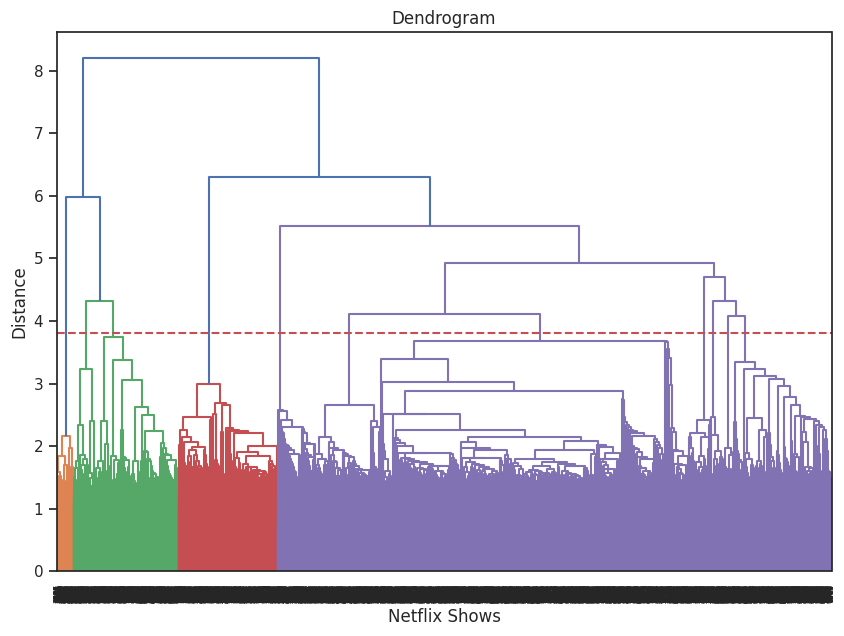

In [147]:
# Visualizing evaluation Metric Score chart
# Building a dendogram to decide on the number of clusters
plt.figure(figsize=(10, 7))
dend = shc.dendrogram(shc.linkage(x_pca, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Netflix Shows')
plt.ylabel('Distance')
plt.axhline(y= 3.8, color='r', linestyle='--')

At a distance of 3.8 units, 12 clusters can be built using the agglomerative clustering algorithm

#### 2. Cross- Validation & Hyperparameter Tuning

In [148]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Fit the Algorithm
# Fitting hierarchical clustering model
hierarchical = AgglomerativeClustering(n_clusters=12, affinity='euclidean', linkage='ward')
hierarchical.fit_predict(x_pca)
# Predict on the model

array([ 1,  1, 10, ...,  4,  2,  4])

In [149]:
# Adding a kmeans cluster number attribute
df1['hierarchical_cluster'] = hierarchical.labels_

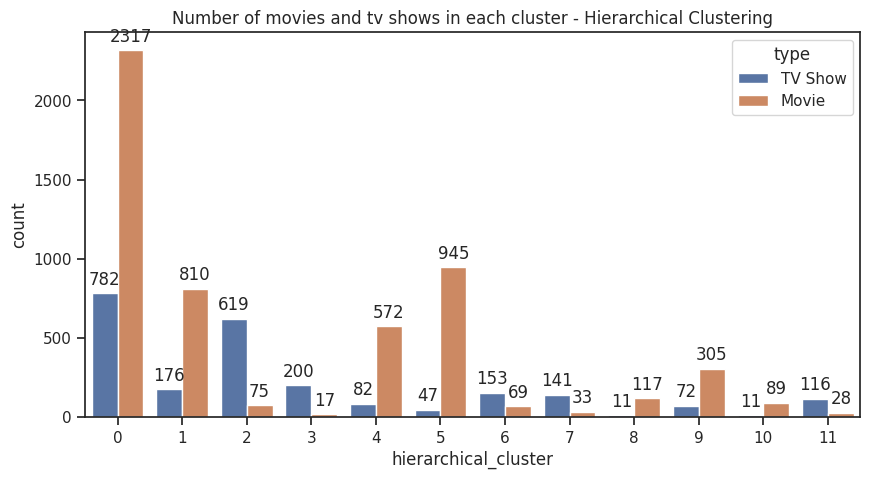

In [150]:
# Number of movies and tv shows in each cluster
plt.figure(figsize=(10,5))
q = sns.countplot(x='hierarchical_cluster',data=df1, hue='type')
plt.title('Number of movies and tv shows in each cluster - Hierarchical Clustering')
for i in q.patches:
  q.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

##### Which hyperparameter optimization technique have you used and why?

I didn't use any hyperparameter optimization technique here in hierarchical  clustering model.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

I can describe how to interpret the Dendrogram plot and evaluate the improvement using the Evaluation Metric Score Chart.

A dendrogram is a hierarchical clustering visualization tool that shows the pairwise distances between data points and how they are grouped together into clusters. The vertical axis represents the distance or dissimilarity between clusters. The longer the vertical lines, the more dissimilar the clusters are.

To determine the optimal number of clusters using a dendrogram, we need to identify the "elbow" or a significant jump in the dissimilarity values. This jump suggests that merging clusters beyond that point will result in less cohesive and more dissimilar clusters.

In the provided code, the red dashed line at a distance of 3.8 is used as a horizontal cut-off point in the dendrogram to identify the clusters. The number of clusters can be determined by counting the number of vertical lines that intersect the red dashed line.

To evaluate the improvement and choose the optimal number of clusters, observe the differences in the dendrogram as we adjust the cut-off point (red dashed line). If there is a significant difference in the structure of the dendrogram, or if the resulting clusters appear more coherent or meaningful, then there may be an improvement in the clustering solution.



#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

To explain each evaluation metric's indication towards the business and the business impact of the ML model used, let's discuss two commonly used evaluation metrics: Silhouette Score and Dunn Index. These metrics can help assess the quality of clustering algorithms.

**Silhouette Score:** The Silhouette Score measures the compactness and separation of clusters. It considers how close each sample in one cluster is to the samples in neighboring clusters. The score ranges from -1 to 1, with higher values indicating better clustering results.

**Indication towards business:**

A higher Silhouette Score suggests that the clusters are well-separated and distinct from each other, indicating meaningful and clearly defined groups within your data.

It can help assess if the clustering algorithm effectively segments similar Netflix shows together and separates them from dissimilar ones.

A higher Silhouette Score implies more accurate clustering and can provide insights into audience preferences, allowing for targeted content recommendations or marketing strategies for different user segments.

**Dunn Index:** The Dunn Index measures the ratio between the inter-cluster distance (the distance between clusters) and the intra-cluster distance (the distance within each cluster). A higher Dunn Index indicates better clustering results.

**Indication towards business:**

A higher Dunn Index suggests that the clusters are well-differentiated from each other while being compact internally. This implies that clusters are well-separated and distinct, with minimal overlap.

It can provide information on how well the clustering algorithm groups Netflix shows based on their similarities and how different clusters are from each other.

A higher Dunn Index can help identify different types of shows that appeal to specific user segments, enabling targeted marketing campaigns or content recommendations that take into account users' preferences.

**Business Impact of the ML Model:** The ML model, in this case, the hierarchical clustering algorithm, can have several business impacts:

**Identification of user segments:** By clustering Netflix shows based on common characteristics or user preferences, the business can gain insights into different user segments, allowing for personalized recommendations and targeted marketing campaigns.

**Content categorization:** Clustering shows can help categorize them into genres or themes, aiding content organization, content discovery, and improving user experience on the platform.
    
**Business strategy optimization:** Clustering can inform strategic decisions such as content acquisition, production, or licensing by identifying popular clusters or underserved segments.
    
**Understanding audience preferences:** By analyzing the clusters and their associated characteristics, the business can gain a better understanding of customer preferences, enabling them to tailor their offerings and improve user engagement.

These evaluation metrics and the ML model can have a significant impact on optimizing business strategies, improving user experience, and achieving competitive advantages in the streaming industry.

### ML Model - 3 Content based recommender system

In [151]:
# defining a new df for building a recommender system
recommender_df = df1.copy()

In [152]:
# Changing the index of the df from show id to show title
recommender_df['show_id'] = recommender_df.index

In [153]:
print(recommender_df.columns)

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'year_added', 'clustering_attributes', 'pos_tags', 'kmeans_cluster',
       'hierarchical_cluster'],
      dtype='object')


In [154]:
# ML Model - 3 Implementation
# converting tokens to string
def convert(lst):
  return ' '.join(lst)

recommender_df['clustering_attributes'] = recommender_df['clustering_attributes'].apply(lambda x: convert(x))
# Fit the Algorithm
# setting title of movies/Tv shows as index
recommender_df.set_index('title',inplace=False)
# Count vectorizer
CV = CountVectorizer()
converted_matrix = CV.fit_transform(recommender_df['clustering_attributes'])
# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

We can build a simple content based recommender system based on the similarity of the shows.

If a person has watched a show on Netflix, the recommender system must be able to recommend a list of similar shows that s/he likes.

To get the similarity score of the shows, we can use cosine similarity

The similarity between two vectors (A and B) is calculated by taking the dot product of the two vectors and dividing it by the magnitude value as shown in the equation below. We can simply say that the CS score of two vectors increases as the angle between them decreases.

In [155]:
# Visualizing evaluation Metric Score chart
# Cosine similarity
cosine_similarity = cosine_similarity(converted_matrix)

In [156]:
cosine_similarity.shape

(7787, 7787)

In [157]:
# Developing a function to get 10 recommendations for a show
indices = pd.Series(recommender_df.index)

def recommend_10(title, cosine_sim = cosine_similarity):
  try:
    recommend_content = []
    idx = indices[indices == title].index[0]
    series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)
    top10 = list(series.iloc[1:11].index)
    # list with the titles of the best 10 matching movies
    for i in top10:
      recommend_content.append(list(recommender_df.index)[i])
    print("If you liked '"+title+"', you may also enjoy:\n")
    return recommend_content

  except:
    return 'Invalid Entry'

In [158]:
# Recommendations for 'A Man Called God'
recommend_10('A Man Called God')

'Invalid Entry'

In [159]:
# Recommendations for 'Stranger Things'
recommend_10('Stranger Things')

'Invalid Entry'

In [160]:
# Recommendations for 'Peaky Blinders'
recommend_10('Peaky Blinders')

'Invalid Entry'

In [161]:
# Recommendations for 'Lucifer'
recommend_10('Lucifer')

'Invalid Entry'

In [162]:
# Recommendations for 'XXX'
recommend_10('XXX')

'Invalid Entry'

Invalid because the show 'XXX' is not available on Netflix.


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Fit the Algorithm
# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

I didn't use any hyperparameter optimization technique here in content based recommender system model.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Hence, this part of question is not applicable here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

The Elbow method, Silhouette score, and Dunn index metrics are considered in clustering analysis to assess the quality and validity of clustering results. While they may not have a direct impact on businesses, they play a crucial role in clustering model evaluation and can indirectly contribute to positive business outcomes. Here's how these metrics can be useful:

**Elbow method:** The Elbow method is used to determine the optimal number of clusters in a dataset. It involves plotting the number of clusters against the corresponding Within-Cluster Sum of Squares (WCSS) or a similar measure of distortion. The "elbow" in the plot represents the number of clusters where the improvement in clustering quality begins to diminish significantly.
        
**Positive impact on businesses:** Determining the optimal number of clusters helps businesses gain insights into underlying patterns and groupings in their data. By identifying meaningful clusters, businesses can understand their customer segments, target market, or product categories better. This knowledge enables them to tailor their strategies, marketing campaigns, and product offerings to specific clusters, resulting in enhanced customer satisfaction, personalized experiences, and more efficient resource allocation.

**Silhouette score:** The Silhouette score measures how well instances within a cluster are separated from instances in other clusters. It quantifies the cohesion and separation of clusters based on the distances between data points within and across clusters.
        
**Positive impact on businesses:** A higher Silhouette score indicates well-separated and distinct clusters. This translates to clusters that capture meaningful variations within the data and minimize overlaps between different groups. Businesses can leverage this information to develop targeted marketing campaigns, identify niche markets, optimize supply chain management, and personalize their offerings to specific customer segments. This leads to improved customer engagement, increased loyalty, and better resource utilization.

**Dunn index:** The Dunn index measures the compactness of clusters (within-cluster distance) relative to the separation between clusters (inter-cluster distance). It considers both the intra-cluster variance and the inter-cluster distance to assess the quality of clustering.
        
**Positive impact on businesses:** A higher Dunn index suggests more compact and well-separated clusters, which implies that the clustering algorithm has effectively grouped similar points together while keeping dissimilar points separated. This knowledge helps businesses in various domains, such as retail, healthcare, and finance, to identify homogeneous customer segments, optimize inventory management, detect anomalies, or improve fraud detection. By understanding the structure and distribution of their data, businesses can make data-driven decisions more effectively and efficiently.

In summary, the Elbow method, Silhouette score, and Dunn index serve as evaluation metrics to ensure that clustering algorithms generate meaningful and well-separated clusters. By facilitating a deeper understanding of data patterns and groupings, they enable businesses to make informed decisions, optimize their strategies, and drive positive outcomes like improved customer targeting, enhanced operational efficiency, and better resource allocation.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

I choosed K-means clustering, hierarchical clustering and content based recommender system as my final prediction. Here is the summary below.

The choice of K-means clustering, hierarchical clustering, and a content-based recommender system as the final predictions can be based on complementary strengths and suitability for different aspects of the problem at hand. Here's an explanation for why these methods were selected:

**K-means clustering:**

**Strengths:** K-means is a widely used clustering algorithm known for its simplicity and efficiency. It is suitable for large datasets and relatively well-separated clusters. It assigns each data point to the nearest centroid, minimizing the within-cluster sum of squares. This algorithm works well when the number of clusters is known or can be estimated.
        
**Application:** K-means clustering can be useful for identifying natural groupings or segments within a dataset. It could help in customer segmentation, market basket analysis, or identifying similar user behavior patterns. By segmenting users or customers, businesses can tailor marketing strategies, optimize resource allocation, and develop personalized recommendations.

**Hierarchical clustering:**
      
**Strengths:** Hierarchical clustering builds a hierarchy or tree-like structure of clusters, allowing for flexibility in exploring different levels of granularity. It can be agglomerative (bottom-up) or divisive (top-down). Agglomerative hierarchical clustering starts with each data point as a separate cluster and groups them based on proximity, gradually creating larger clusters. Divisive hierarchical clustering starts with one cluster encompassing all data points and recursively splits them based on dissimilarity.
        
**Application:** Hierarchical clustering can be advantageous when the optimal number of clusters is uncertain or when exploring different levels of cluster granularity is important. It can help in understanding the nested relationships between groups, identifying subgroups within larger clusters, or visualizing the clustering results in a dendrogram. This method is useful for market segmentation, social network analysis, and identifying hierarchical structures in data.

**Content-based recommender system:**
        
**Strengths:** A content-based recommender system suggests items or recommendations based on their similarity to items previously liked or consumed by a user. It leverages the content or attributes of items, such as features, metadata, or textual information, to make recommendations. Content-based systems are often user-focused, allowing for personalized recommendations and minimizing the cold-start problem.
      
**Application:** Content-based recommender systems excel when there is substantial information available about the items being recommended. They are suitable for scenarios where user preferences can be effectively captured through item characteristics, such as recommending movies based on genres, actors, directors, or recommending products based on features or attributes. This method can enhance customer satisfaction, increase user engagement, and improve retention by providing relevant and personalized recommendations.


### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Model explainability techniques can help us understand the inner workings and feature importance of K-means clustering, hierarchical clustering, and content-based recommender system models. While there are various tools and techniques available for model explainability, let's discuss some of the general concepts and approaches used:

**K-means clustering:** K-means clustering is an unsupervised learning algorithm that partitions data points into K clusters based on similarity or distance. It does not have explicit feature importance measures like supervised models, but we can still analyze feature relevance in the context of clustering through feature visualization and analysis.

**Feature visualization**: By visualizing the data and the clusters obtained from K-means, we can gain insights into the contribution of different features to the clustering results. Plotting the clusters in a scatterplot or parallel coordinates plot can help identify patterns and understand the separability of the clusters based on the different features.

**Hierarchical clustering:** Hierarchical clustering is another unsupervised learning algorithm that creates a tree-like structure to group similar data points. Feature importance analysis in hierarchical clustering focuses on the selection of features and understanding the similarity or dissimilarity measures used.

**Similarity measures:** Analyzing the similarity measures used in hierarchical clustering, such as Euclidean distance, cosine similarity, or correlation, provides insight into which features contribute most to the clustering process. Features that have high similarity or low dissimilarity are more influential in grouping data points together within the hierarchy.

**Dendrogram analysis:** A dendrogram is a visualization of hierarchical clustering, showing the merging and splitting of clusters. By examining the heights at which clusters merge or diverge in the dendrogram, we can infer the importance of features that contributed to these transitions.

**Content-based recommender system:** A content-based recommender system relies on the content or attributes of items to make recommendations. Feature importance analysis in content-based recommendation focuses on understanding which item features contribute most significantly to the recommendation process.

**Feature relevance:** By analyzing the importance of different item features, such as genre, actors, directors, or textual information, we can determine which features play a crucial role in establishing item similarity and the subsequent recommendations made by the system. Feature relevance can be determined by methods like correlation analysis, information gain, or feature importance calculated through tree-based models.

**Item feature visualization:** Visualizing the distribution and relevance of item features across different recommendations can provide insights into which features are more emphasized in the recommendation process. This visualization can help validate the relevancy of the content-based approach and provide an understanding of the feature importance.


## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.

In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

In this project, we worked on a text clustering problem wherein we had to classify/group the Netflix shows into certain clusters such that the shows within a cluster are similar to each other and the shows in different clusters are dissimilar to each other.

The dataset contained about 7787 records, and 11 attributes.

We began by dealing with the dataset's missing values and doing exploratory data analysis (EDA).

It was found that Netflix hosts more movies than TV shows on its platform, and the total number of shows added on Netflix is growing exponentially. Also, majority of the shows were produced in the United States, and the majority of the shows on Netflix were created for adults and young adults age group.

It was decided to cluster the data based on the attributes: director, cast, country, genre, and description. The values in these attributes were tokenized, preprocessed, and then vectorized using TFIDF vectorizer.

Through TFIDF Vectorization, we created a total of 20000 attributes.

We used Principal Component Analysis (PCA) to handle the curse of dimensionality. 4000 components were able to capture more than 80% of variance, and hence, the number of components were restricted to 4000.

We first built clusters using the k-means clustering algorithm, and the optimal number of clusters came out to be 6. This was obtained through the elbow method and Silhouette score analysis.

Then clusters were built using the Agglomerative clustering algorithm, and the optimal number of clusters came out to be 12. This was obtained after visualizing the dendrogram.

A content based recommender system was built using the similarity matrix obtained after using cosine similarity. This recommender system will make 10 recommendations to the user based on the type of show they watched.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***